In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 10
print(np._version)
print(pd._version)
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math

<module 'numpy._version' from '/usr/local/lib/python3.10/dist-packages/numpy/_version.py'>
<module 'pandas._version' from '/usr/local/lib/python3.10/dist-packages/pandas/_version.py'>


In [8]:
# Get the Data

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
path="/content/drive/MyDrive/hellobook/Election_Data.xlsx"

In [10]:
df=pd.read_excel(path)

In [11]:
df.head()

Unnamed: 0    vote  age  economic.cond.national  economic.cond.household  \
0           1  Labour   43                       3                        3   
1           2  Labour   36                       4                        4   
2           3  Labour   35                       4                        4   
3           4  Labour   24                       4                        2   
4           5  Labour   41                       2                        2   

   Blair  Hague  Europe  political.knowledge  gender  
0      4      1       2                    2  female  
1      4      4       5                    2    male  
2      5      2       3                    2    male  
3      2      1       4                    0  female  
4      1      1       6                    2    male

In [12]:
df.tail()

Unnamed: 0          vote  age  economic.cond.national  \
1520        1521  Conservative   67                       5   
1521        1522  Conservative   73                       2   
1522        1523        Labour   37                       3   
1523        1524  Conservative   61                       3   
1524        1525  Conservative   74                       2   

      economic.cond.household  Blair  Hague  Europe  political.knowledge  \
1520                        3      2      4      11                    3   
1521                        2      4      4       8                    2   
1522                        3      5      4       2                    2   
1523                        3      1      4      11                    2   
1524                        3      2      4      11                    0   

      gender  
1520    male  
1521    male  
1522    male  
1523    male  
1524  female

In [13]:
df.drop( columns={'Unnamed: 0':'index'}, inplace=True )

In [14]:
df.head()

vote  age  economic.cond.national  economic.cond.household  Blair  Hague  \
0  Labour   43                       3                        3      4      1   
1  Labour   36                       4                        4      4      4   
2  Labour   35                       4                        4      5      2   
3  Labour   24                       4                        2      2      1   
4  Labour   41                       2                        2      1      1   

   Europe  political.knowledge  gender  
0       2                    2  female  
1       5                    2    male  
2       3                    2    male  
3       4                    0  female  
4       6                    2    male

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [16]:
df.shape

(1525, 9)

In [17]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [18]:
df

vote  age  economic.cond.national  economic.cond.household  \
0           Labour   43                       3                        3   
1           Labour   36                       4                        4   
2           Labour   35                       4                        4   
3           Labour   24                       4                        2   
4           Labour   41                       2                        2   
...            ...  ...                     ...                      ...   
1520  Conservative   67                       5                        3   
1521  Conservative   73                       2                        2   
1522        Labour   37                       3                        3   
1523  Conservative   61                       3                        3   
1524  Conservative   74                       2                        3   

      Blair  Hague  Europe  political.knowledge  gender  
0         4      1       2                    2  female  
1         4      4       5                    2    male  
2         5      2       3                    2    male  
3         2      1       4                    0  female  
4         1      1       6                    2    male  
...     ...    ...     ...                  ...     ...  
1520      2      4      11                    3    male  
1521      4      4       8                    2    male  
1522      5      4       2                    2    male  
1523      1      4      11                    2    male  
1524      2      4      11                    0  female  

[1525 rows x 9 columns]

In [19]:
df.describe().T

count       mean        std   min   25%   50%   75%  \
age                      1525.0  54.182295  15.711209  24.0  41.0  53.0  67.0   
economic.cond.national   1525.0   3.245902   0.880969   1.0   3.0   3.0   4.0   
economic.cond.household  1525.0   3.140328   0.929951   1.0   3.0   3.0   4.0   
Blair                    1525.0   3.334426   1.174824   1.0   2.0   4.0   4.0   
Hague                    1525.0   2.746885   1.230703   1.0   2.0   2.0   4.0   
Europe                   1525.0   6.728525   3.297538   1.0   4.0   6.0  10.0   
political.knowledge      1525.0   1.542295   1.083315   0.0   0.0   2.0   2.0   

                          max  
age                      93.0  
economic.cond.national    5.0  
economic.cond.household   5.0  
Blair                     5.0  
Hague                     5.0  
Europe                   11.0  
political.knowledge       3.0

In [20]:
#Check for presence of duplicate rows
df.duplicated().sum()

8

In [21]:
df=df.drop_duplicates()

In [22]:
df.duplicated().sum()

0

In [23]:
df.shape

(1517, 9)

In [24]:
df

vote  age  economic.cond.national  economic.cond.household  \
0           Labour   43                       3                        3   
1           Labour   36                       4                        4   
2           Labour   35                       4                        4   
3           Labour   24                       4                        2   
4           Labour   41                       2                        2   
...            ...  ...                     ...                      ...   
1520  Conservative   67                       5                        3   
1521  Conservative   73                       2                        2   
1522        Labour   37                       3                        3   
1523  Conservative   61                       3                        3   
1524  Conservative   74                       2                        3   

      Blair  Hague  Europe  political.knowledge  gender  
0         4      1       2                    2  female  
1         4      4       5                    2    male  
2         5      2       3                    2    male  
3         2      1       4                    0  female  
4         1      1       6                    2    male  
...     ...    ...     ...                  ...     ...  
1520      2      4      11                    3    male  
1521      4      4       8                    2    male  
1522      5      4       2                    2    male  
1523      1      4      11                    2    male  
1524      2      4      11                    0  female  

[1517 rows x 9 columns]

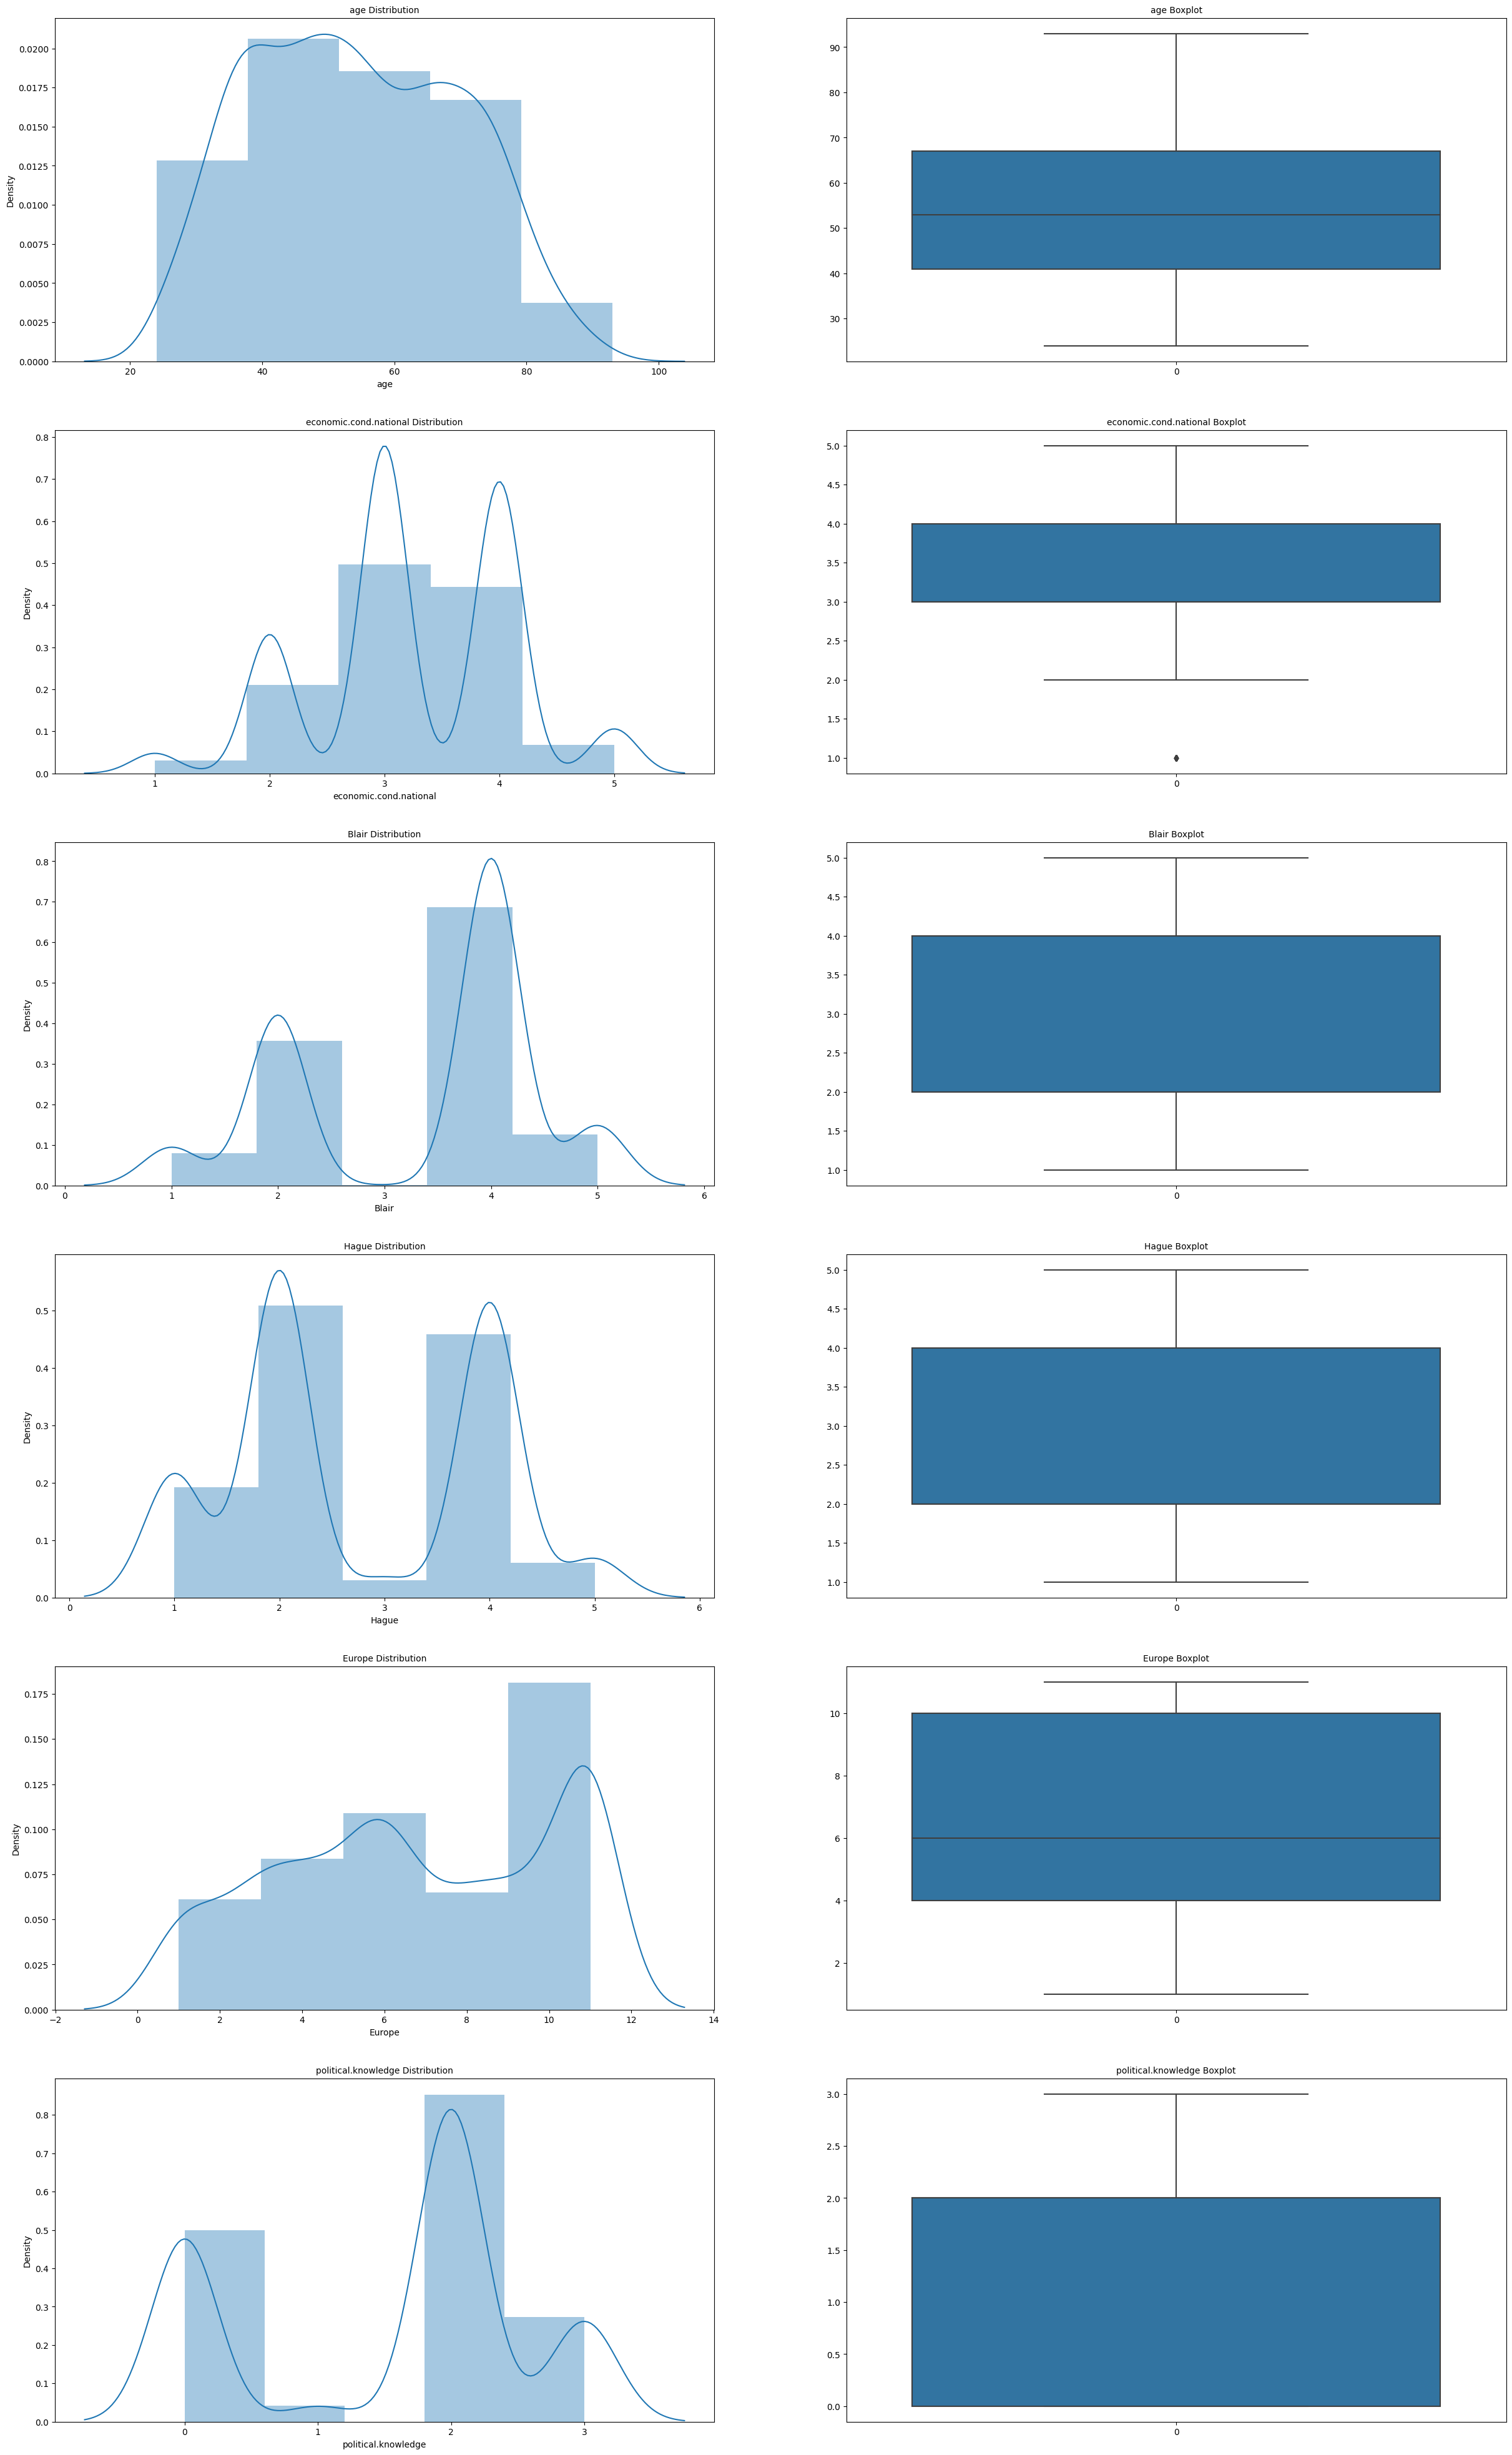

In [25]:
fig, axes = plt.subplots(nrows=6,ncols=2)
fig.set_size_inches(30,50)

a = sns.distplot(df['age'] ,bins=5, ax=axes[0][0]);
a.set_title("age Distribution",fontsize=10)

a = sns.boxplot(df['age'] , orient = "v" , ax=axes[0][1]);
a.set_title("age Boxplot",fontsize=10)


a = sns.distplot(df['economic.cond.national'] ,bins=5, ax=axes[1][0]);
a.set_title("economic.cond.national Distribution",fontsize=10)

a = sns.boxplot(df['economic.cond.national'] , orient = "v" , ax=axes[1][1]);
a.set_title("economic.cond.national Boxplot",fontsize=10)


a = sns.distplot(df['Blair'] ,bins=5, ax=axes[2][0]);
a.set_title("Blair Distribution",fontsize=10)

a = sns.boxplot(df['Blair'] , orient = "v" , ax=axes[2][1])
a.set_title("Blair Boxplot",fontsize=10)

a = sns.distplot(df['Hague'] ,bins=5, ax=axes[3][0]);
a.set_title("Hague Distribution",fontsize=10)

a = sns.boxplot(df['Hague'] , orient = "v" , ax=axes[3][1]);
a.set_title("Hague Boxplot",fontsize=10)

a = sns.distplot(df['Europe'] ,bins=5, ax=axes[4][0]);
a.set_title("Europe Distribution",fontsize=10)

a = sns.boxplot(df['Europe'] , orient = "v" , ax=axes[4][1]);
a.set_title("Europe Boxplot",fontsize=10)

a = sns.distplot(df['political.knowledge'] ,bins=5, ax=axes[5][0]);
a.set_title("political.knowledge Distribution",fontsize=10)

a = sns.boxplot(df['political.knowledge'] , orient = "v" , ax=axes[5][1]);
a.set_title("political.knowledge Boxplot",fontsize=10)

plt.show()

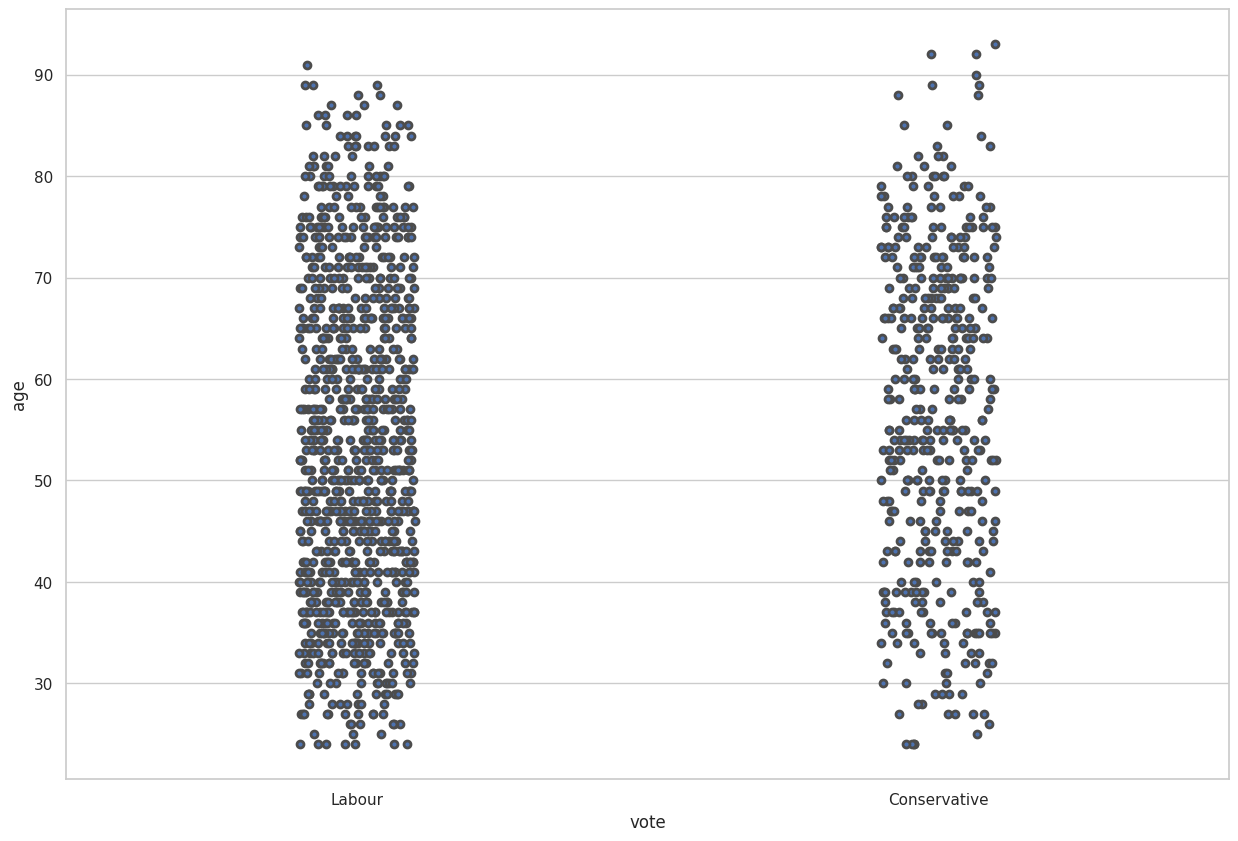

In [ ]:
plt.figure(figsize=(15,10))
sns.set(style = 'whitegrid')
sns.stripplot(x="vote", y="age", data=df,jitter=True,linewidth=2);
plt.show()

In [ ]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)


[]
['vote', 'age', 'economic_cond_national', 'economic_cond_household', 'Blair', 'Hague', 'Europe', 'political_knowledge', 'gender_male']


In [ ]:
df[num].describe().T

count       mean        std   min   25%   50%   75%  \
age                      1517.0  54.241266  15.701741  24.0  41.0  53.0  67.0   
economic.cond.national   1517.0   3.245221   0.881792   1.0   3.0   3.0   4.0   
economic.cond.household  1517.0   3.137772   0.931069   1.0   3.0   3.0   4.0   
Blair                    1517.0   3.335531   1.174772   1.0   2.0   4.0   4.0   
Hague                    1517.0   2.749506   1.232479   1.0   2.0   2.0   4.0   
Europe                   1517.0   6.740277   3.299043   1.0   4.0   6.0  10.0   
political.knowledge      1517.0   1.540541   1.084417   0.0   0.0   2.0   2.0   

                          max  
age                      93.0  
economic.cond.national    5.0  
economic.cond.household   5.0  
Blair                     5.0  
Hague                     5.0  
Europe                   11.0  
political.knowledge       3.0

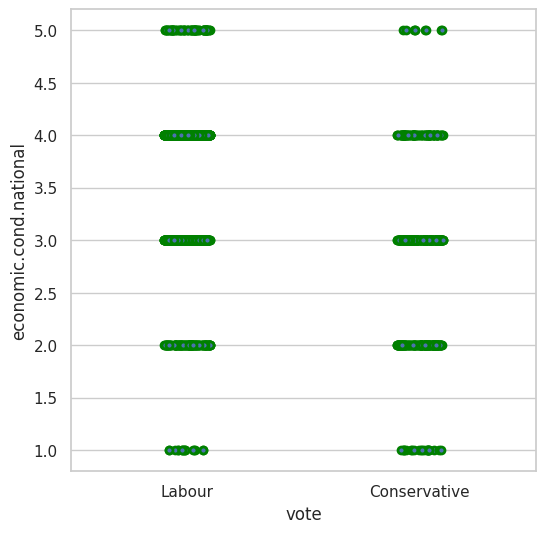

In [ ]:
plt.figure(figsize=(6,6))
sns.set(style = 'whitegrid')
sns.stripplot(x="vote", y="economic.cond.national", data=df,jitter=True,linewidth=2,edgecolor='green');
plt.show()

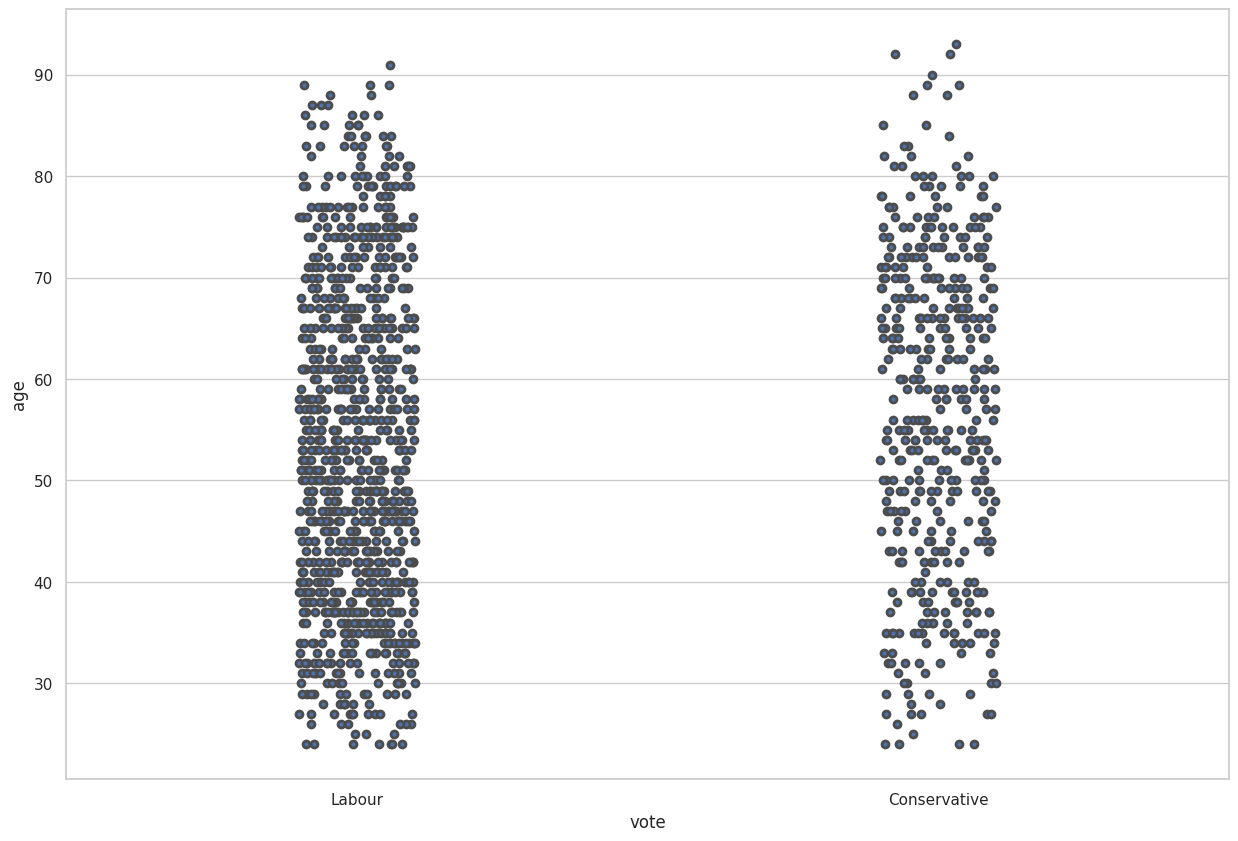

In [ ]:
plt.figure(figsize=(15,10))
sns.set(style = 'whitegrid')
sns.stripplot(x="vote", y="age", data=df,jitter=True,linewidth=2);
plt.show()

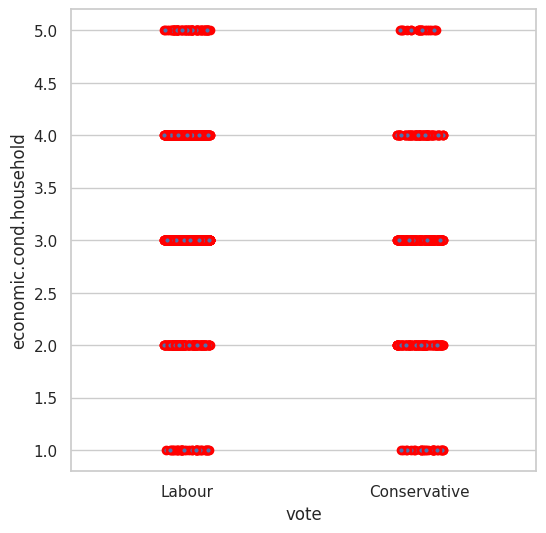

In [ ]:
plt.figure(figsize=(6,6))
sns.set(style = 'whitegrid')
sns.stripplot(x="vote", y="economic.cond.household", data=df,jitter=True,linewidth=2,edgecolor='red');
plt.show()

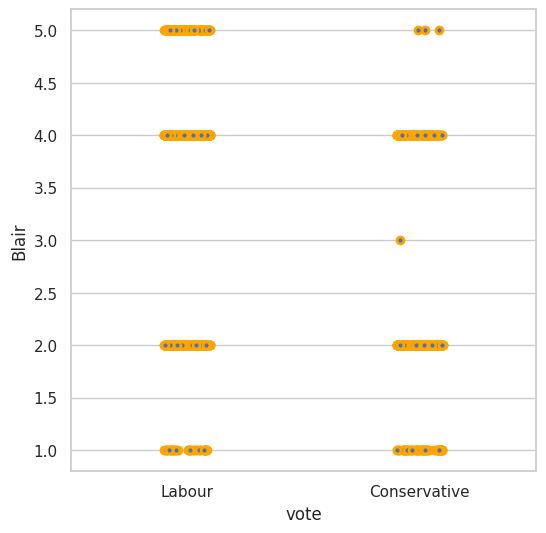

In [ ]:
plt.figure(figsize=(6,6))
sns.set(style = 'whitegrid')
sns.stripplot(x="vote", y="Blair", data=df,jitter=True,linewidth=2,edgecolor='orange');
plt.show()

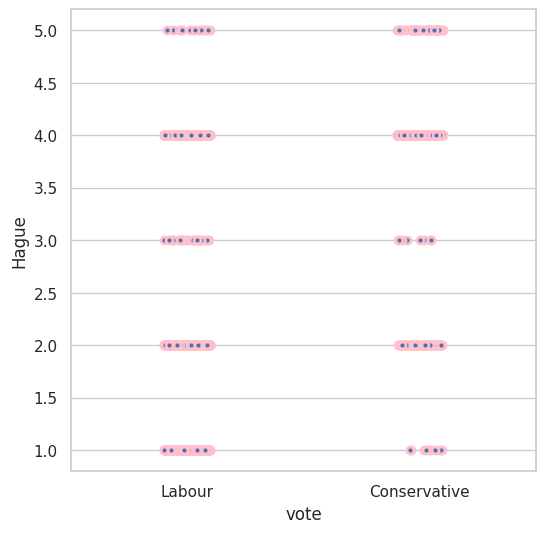

In [ ]:
plt.figure(figsize=(6,6))
sns.set(style = 'whitegrid')
sns.stripplot(x="vote", y="Hague", data=df,jitter=True,linewidth=2,edgecolor='pink');
plt.show()

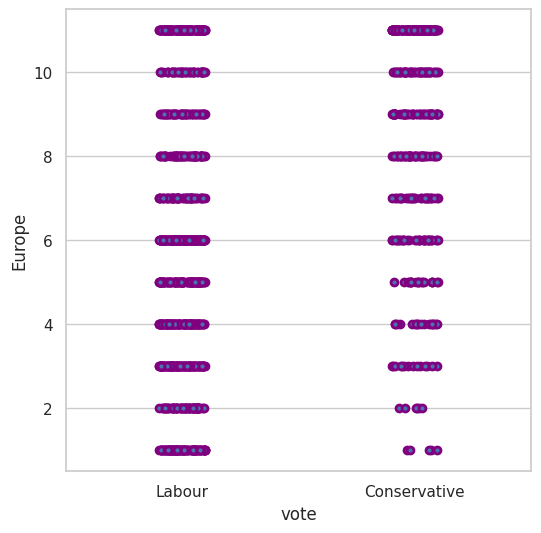

In [ ]:
plt.figure(figsize=(6,6))
sns.set(style = 'whitegrid')
sns.stripplot(x="vote", y="Europe", data=df,jitter=True,linewidth=2,edgecolor='purple');
plt.show()

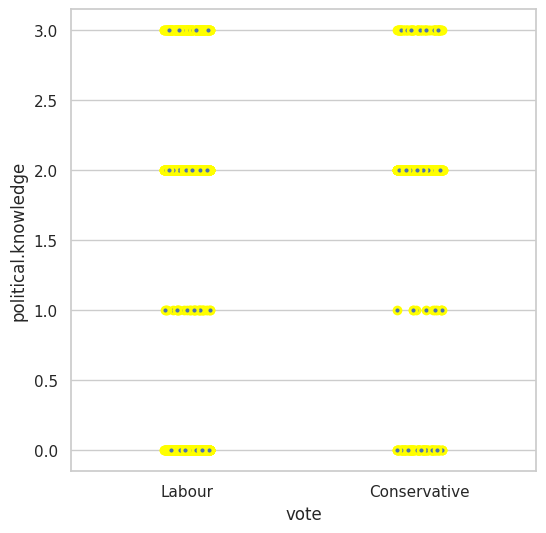

In [ ]:
plt.figure(figsize=(6,6))
sns.set(style = 'whitegrid')
sns.stripplot(x="vote", y="political.knowledge", data=df,jitter=True,linewidth=2,edgecolor='yellow');
plt.show()

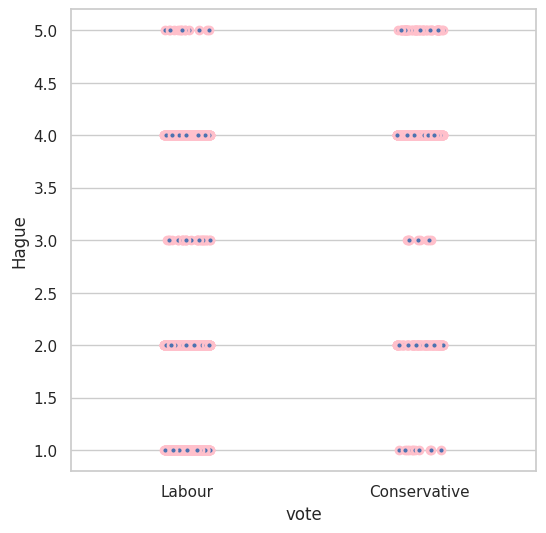

In [ ]:
plt.figure(figsize=(6,6))
sns.set(style = 'whitegrid')
sns.stripplot(x="vote", y="Hague", data=df,jitter=True,linewidth=2,edgecolor='pink');
plt.show()

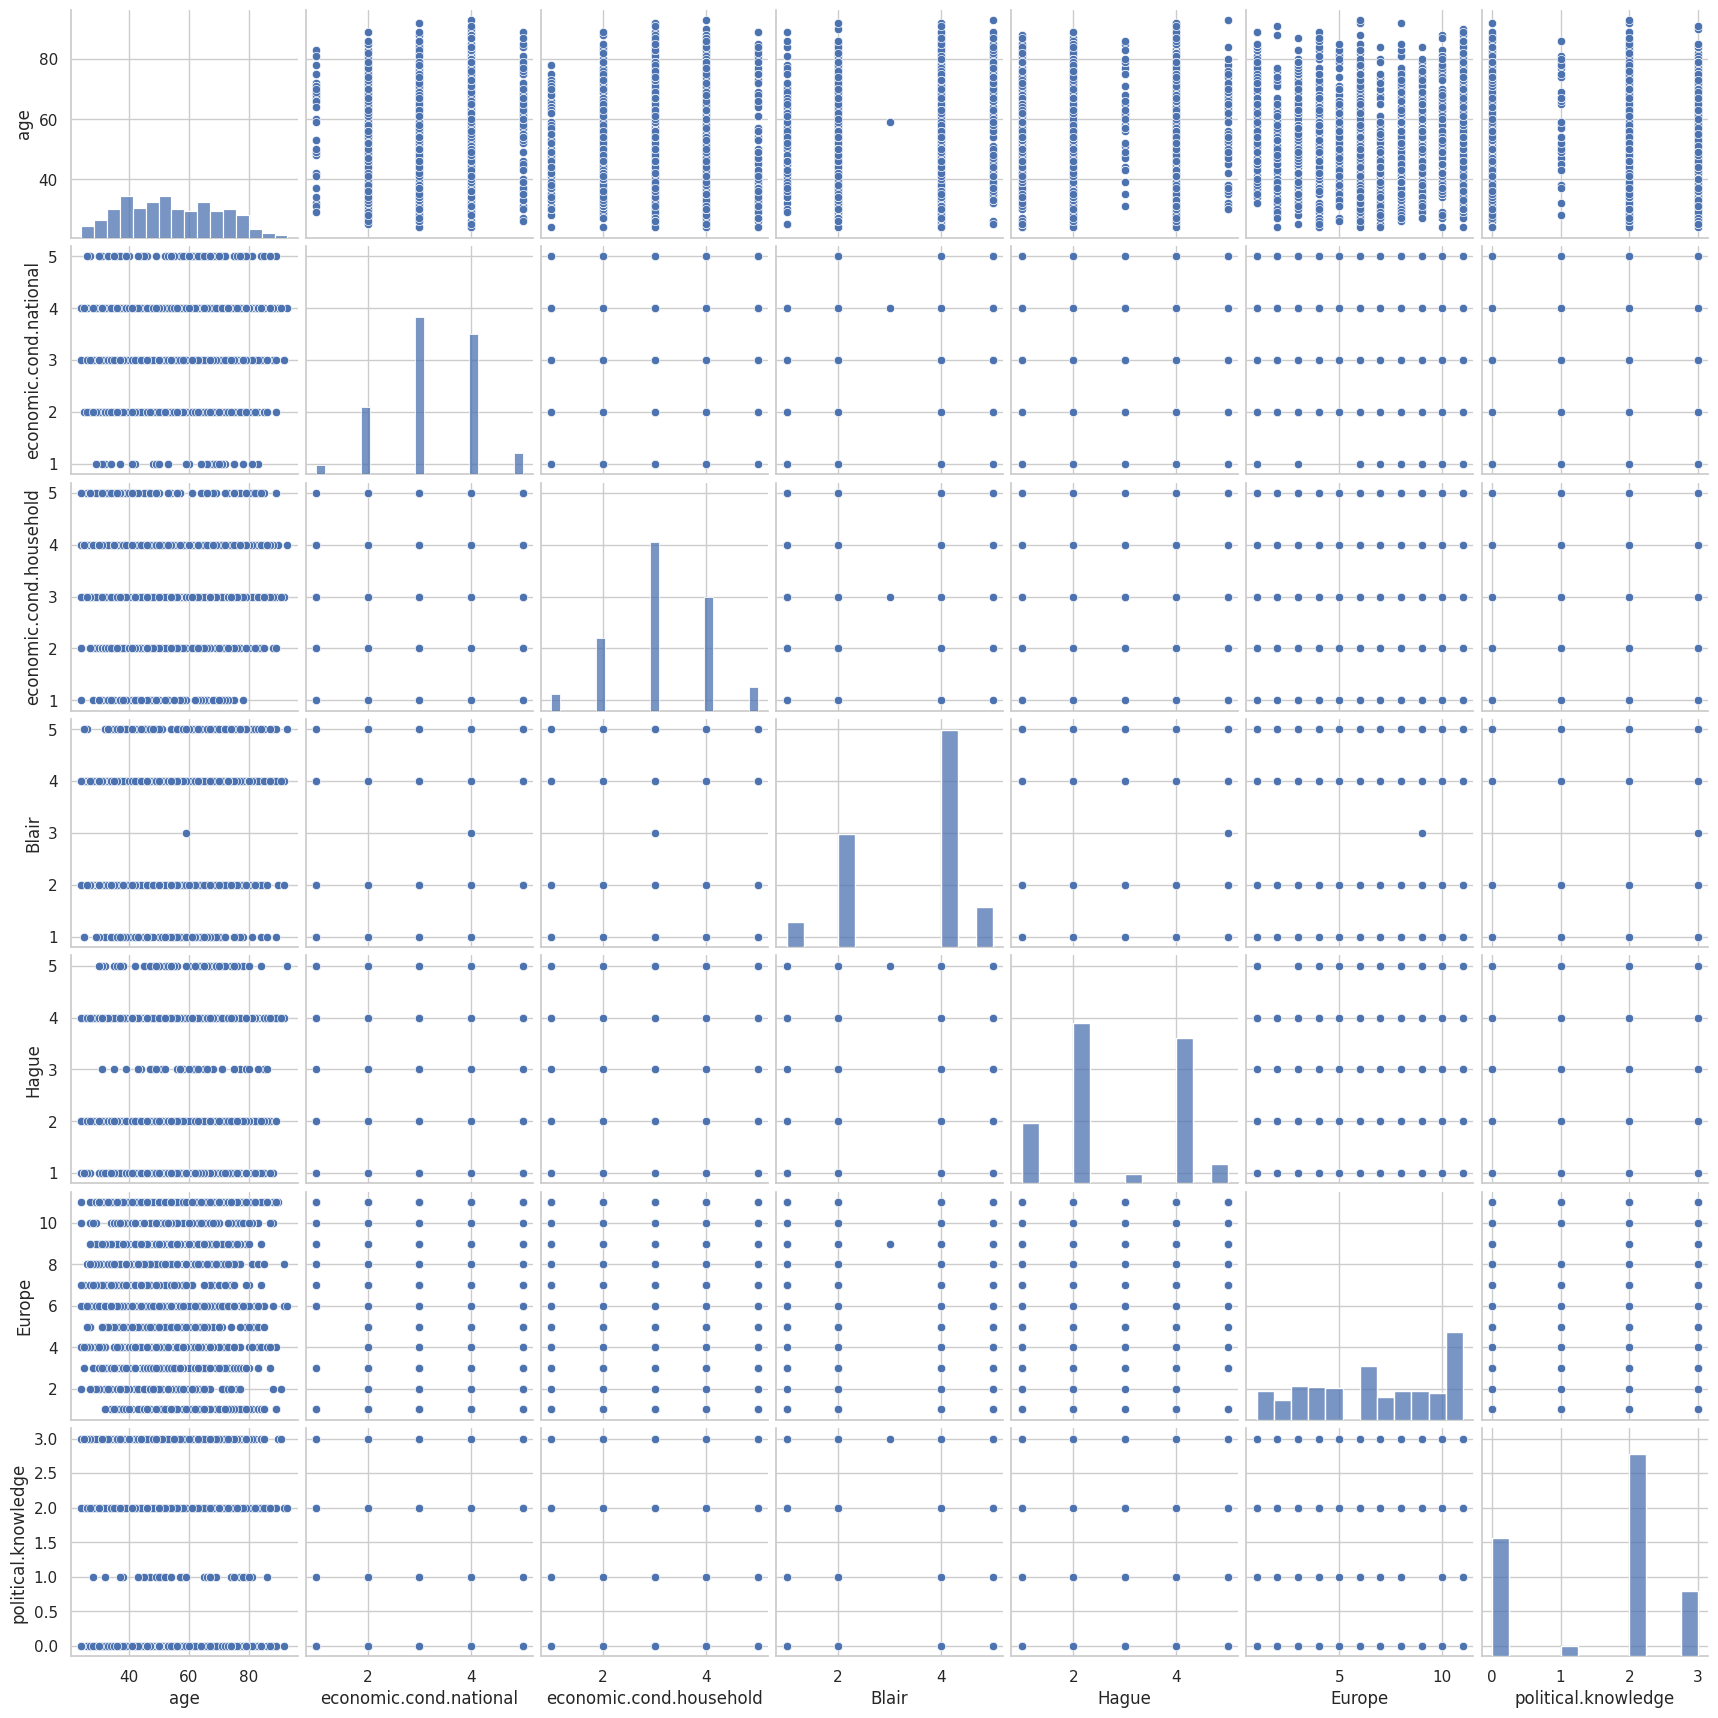

In [ ]:
sns.pairplot(df)

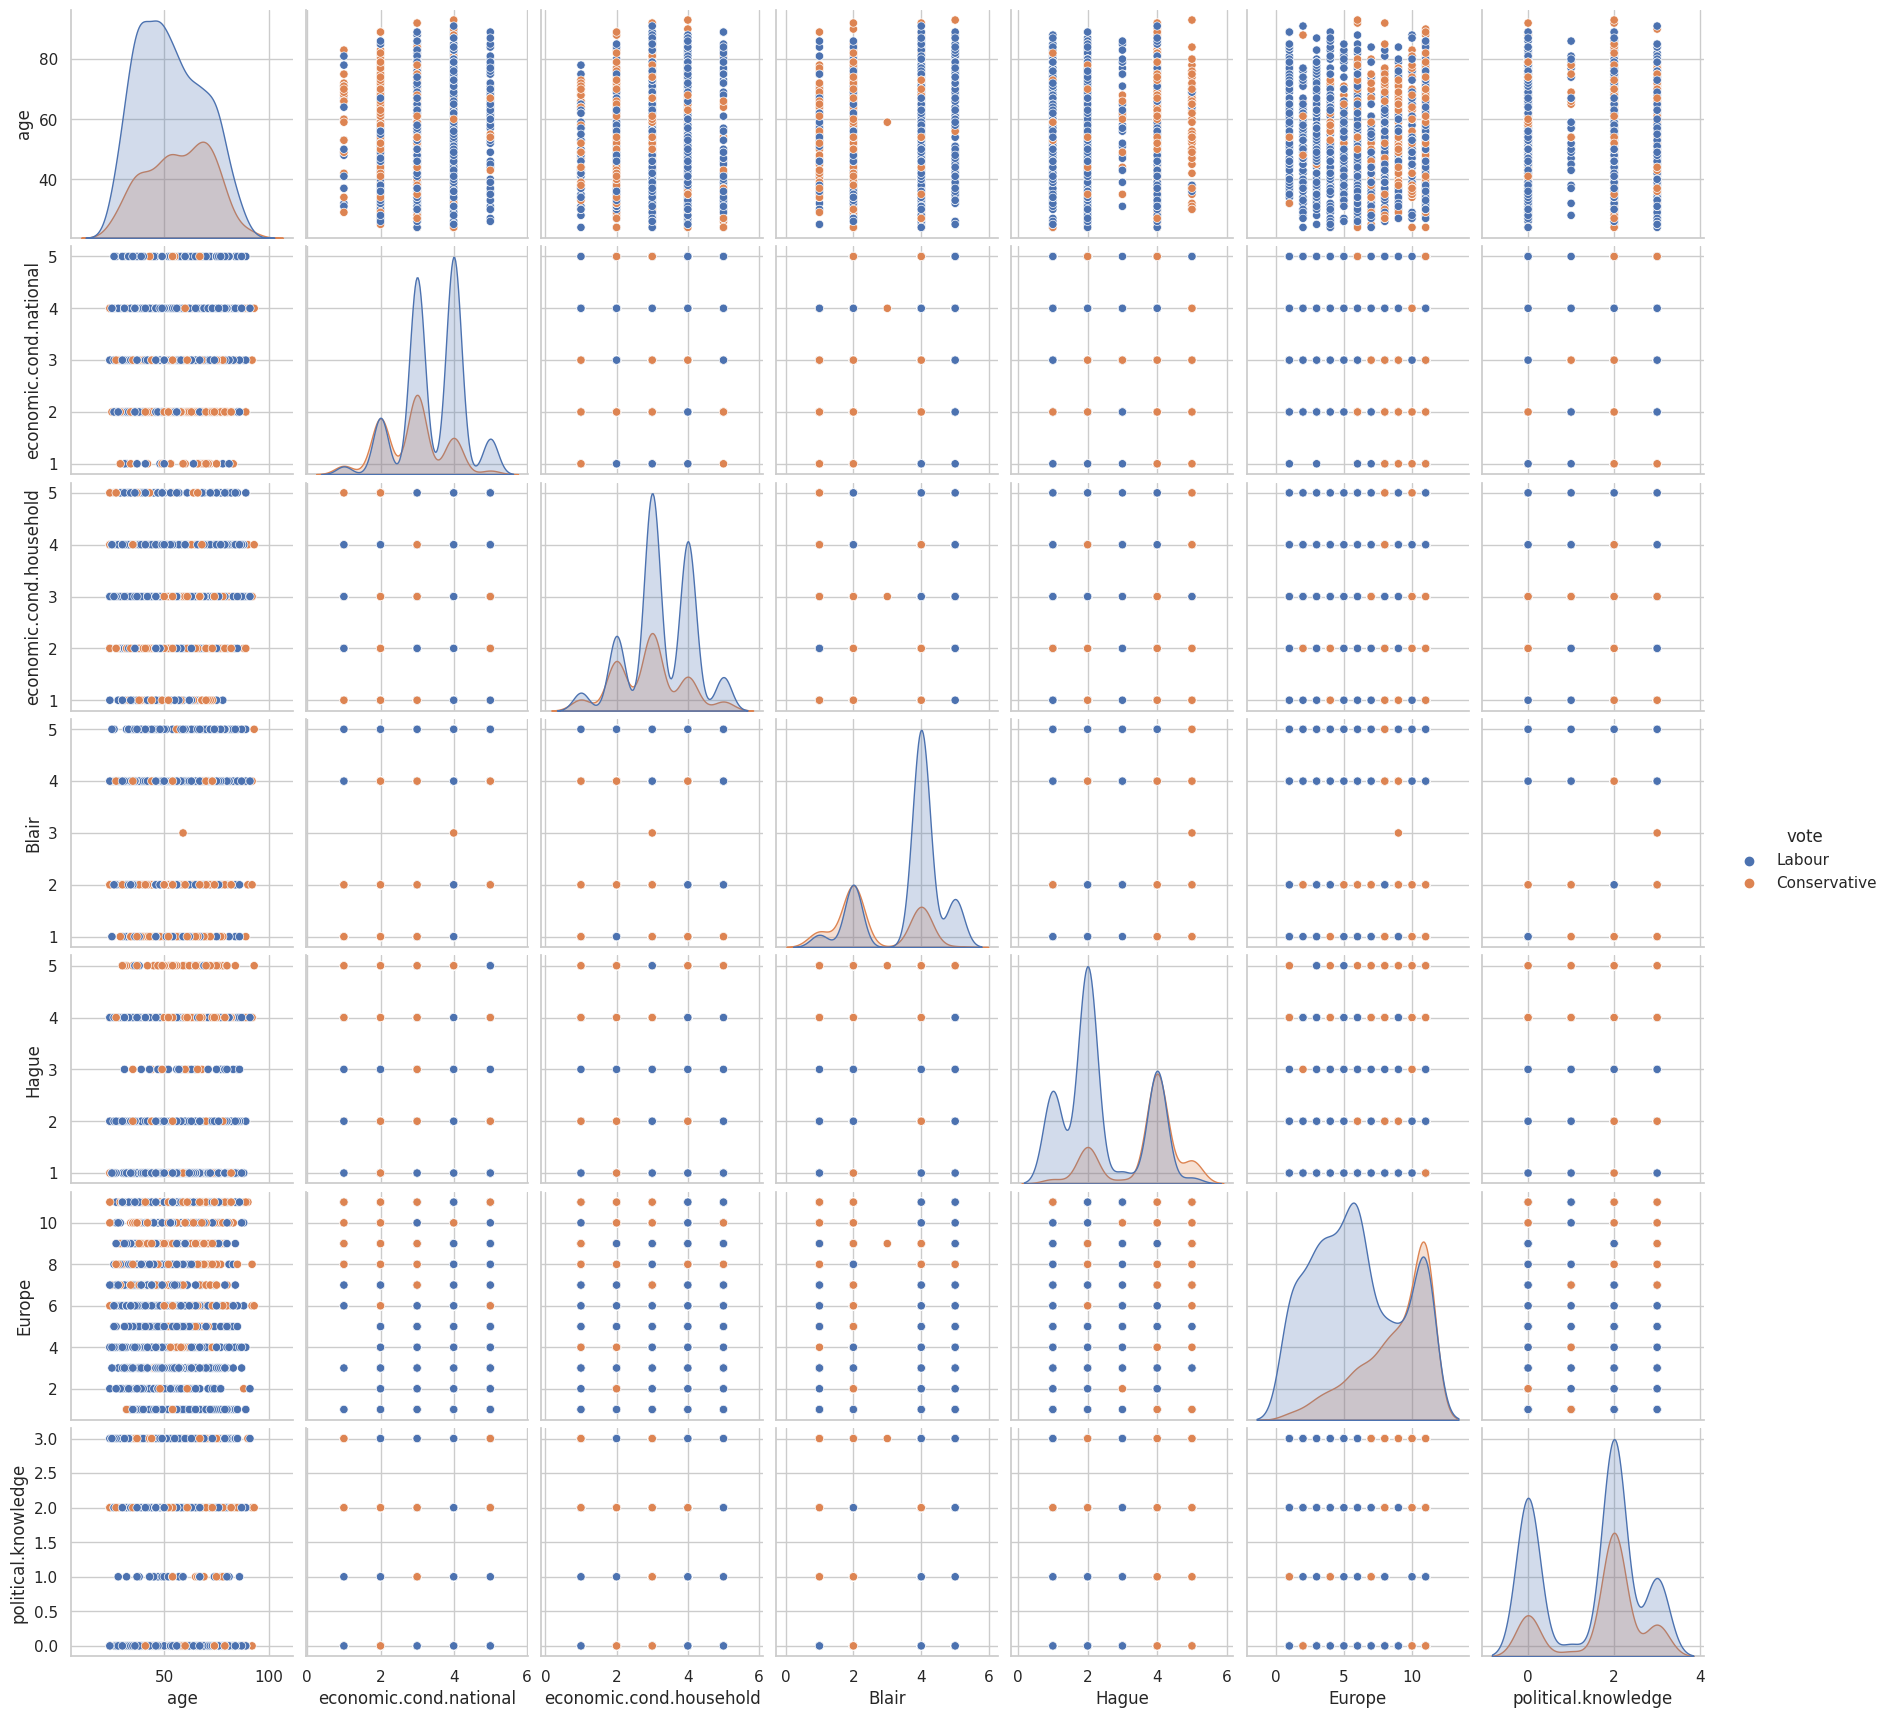

In [ ]:
# Pairplot using sns

sns.pairplot(df , hue='vote' , diag_kind = 'kde');

In [26]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     460
Labour          1057
Name: vote, dtype: int64


GENDER :  2
male      709
female    808
Name: gender, dtype: int64




In [27]:
df = pd.get_dummies(df, columns=['gender'],drop_first=True)

In [28]:
feature_encoding = {"vote":     {"Labour": 1, "Conservative": 0}}
df=df.replace(feature_encoding)
df.rename(columns={"political.knowledge": "political_knowledge",
                        "economic.cond.national":"economic_cond_national",
                        "economic.cond.household":"economic_cond_household"
                       },inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1517 non-null   int64
 1   age                      1517 non-null   int64
 2   economic_cond_national   1517 non-null   int64
 3   economic_cond_household  1517 non-null   int64
 4   Blair                    1517 non-null   int64
 5   Hague                    1517 non-null   int64
 6   Europe                   1517 non-null   int64
 7   political_knowledge      1517 non-null   int64
 8   gender_male              1517 non-null   uint8
dtypes: int64(8), uint8(1)
memory usage: 140.4 KB


In [29]:
df.head()

vote  age  economic_cond_national  economic_cond_household  Blair  Hague  \
0     1   43                       3                        3      4      1   
1     1   36                       4                        4      4      4   
2     1   35                       4                        4      5      2   
3     1   24                       4                        2      2      1   
4     1   41                       2                        2      1      1   

   Europe  political_knowledge  gender_male  
0       2                    2            0  
1       5                    2            1  
2       3                    2            1  
3       4                    0            0  
4       6                    2            1

In [30]:
for feature in df.columns:
    if df[feature].dtype == 'object':
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1517 non-null   int64
 1   age                      1517 non-null   int64
 2   economic_cond_national   1517 non-null   int64
 3   economic_cond_household  1517 non-null   int64
 4   Blair                    1517 non-null   int64
 5   Hague                    1517 non-null   int64
 6   Europe                   1517 non-null   int64
 7   political_knowledge      1517 non-null   int64
 8   gender_male              1517 non-null   uint8
dtypes: int64(8), uint8(1)
memory usage: 140.4 KB


In [32]:
df.head()

vote  age  economic_cond_national  economic_cond_household  Blair  Hague  \
0     1   43                       3                        3      4      1   
1     1   36                       4                        4      4      4   
2     1   35                       4                        4      5      2   
3     1   24                       4                        2      2      1   
4     1   41                       2                        2      1      1   

   Europe  political_knowledge  gender_male  
0       2                    2            0  
1       5                    2            1  
2       3                    2            1  
3       4                    0            0  
4       6                    2            1

In [33]:
df.tail()

vote  age  economic_cond_national  economic_cond_household  Blair  \
1520     0   67                       5                        3      2   
1521     0   73                       2                        2      4   
1522     1   37                       3                        3      5   
1523     0   61                       3                        3      1   
1524     0   74                       2                        3      2   

      Hague  Europe  political_knowledge  gender_male  
1520      4      11                    3            1  
1521      4       8                    2            1  
1522      4       2                    2            1  
1523      4      11                    2            1  
1524      4      11                    0            0

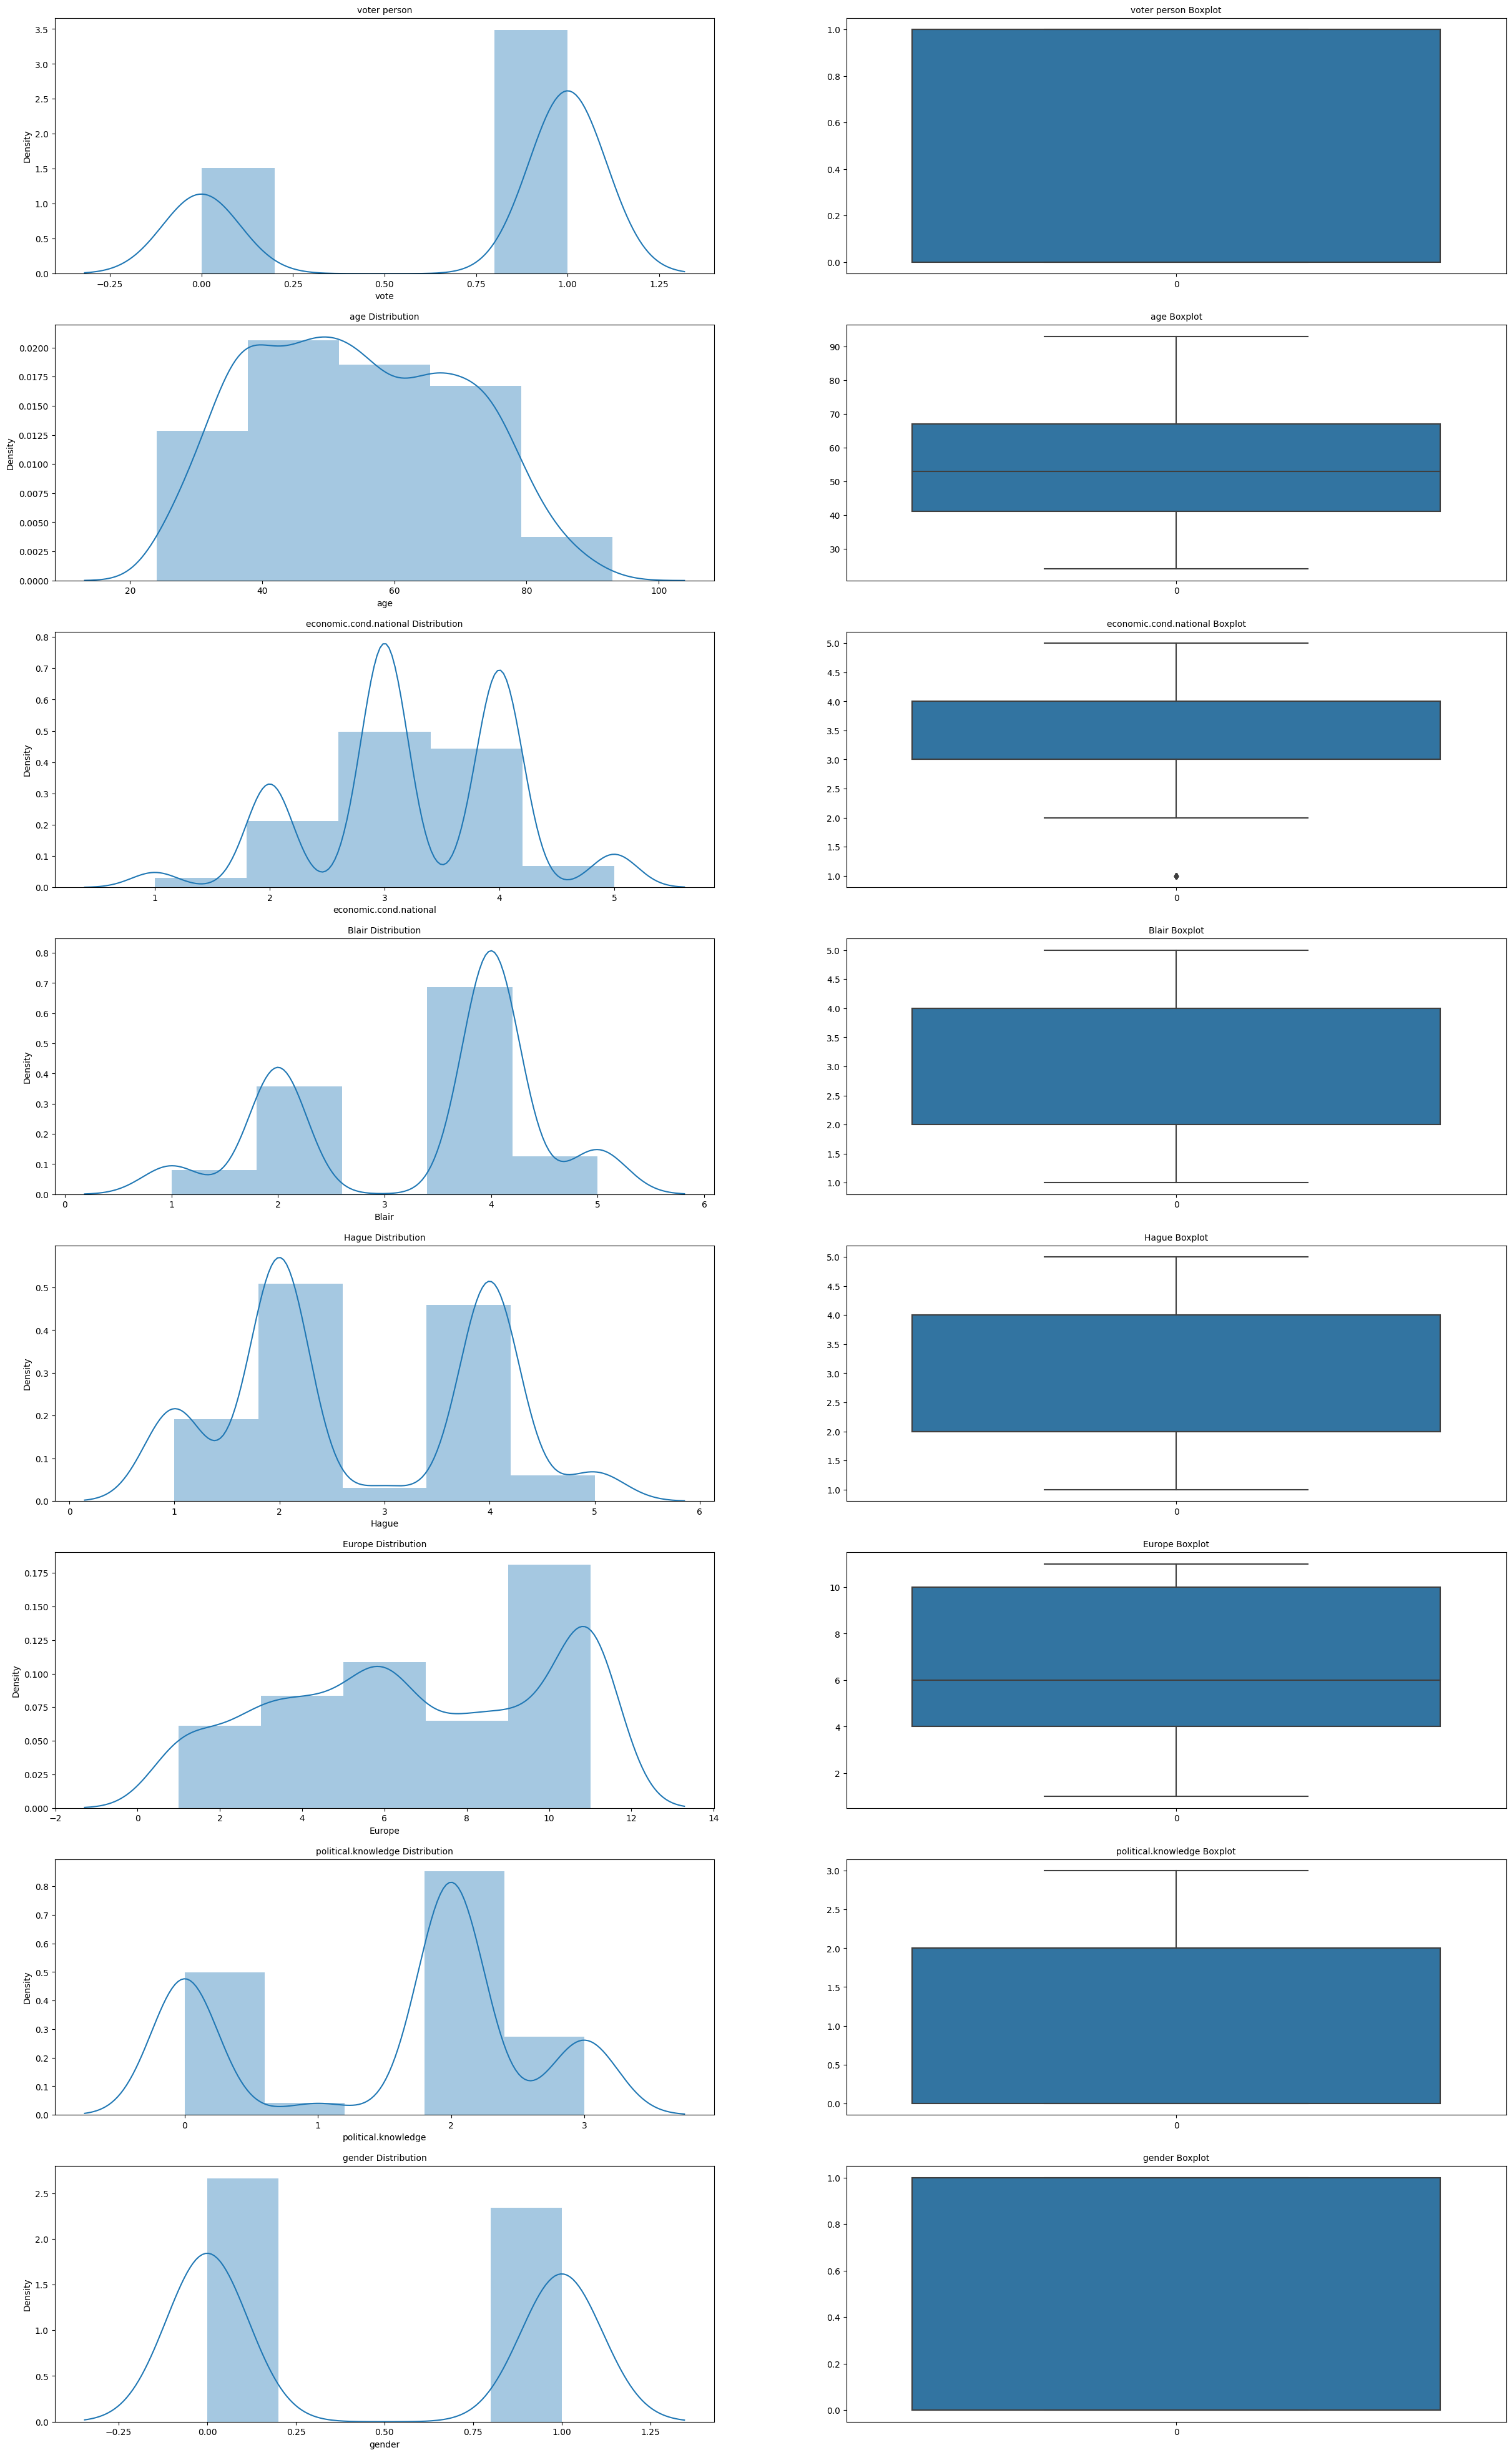

In [ ]:
fig, axes = plt.subplots(nrows=8,ncols=2)
fig.set_size_inches(30,50)
a = sns.distplot(df['vote'] , ax=axes[0][0],bins=5);
a.set_title("voter person",fontsize=10)

a = sns.boxplot(df['vote'] , orient = "v" , ax=axes[0][1]);
a.set_title("voter person Boxplot",fontsize=10)

a = sns.distplot(df['age'] ,bins=5, ax=axes[1][0]);
a.set_title("age Distribution",fontsize=10)

a = sns.boxplot(df['age'] , orient = "v" , ax=axes[1][1]);
a.set_title("age Boxplot",fontsize=10)


a = sns.distplot(df['economic.cond.national'] ,bins=5, ax=axes[2][0]);
a.set_title("economic.cond.national Distribution",fontsize=10)

a = sns.boxplot(df['economic.cond.national'] , orient = "v" , ax=axes[2][1]);
a.set_title("economic.cond.national Boxplot",fontsize=10)


a = sns.distplot(df['Blair'] ,bins=5, ax=axes[3][0]);
a.set_title("Blair Distribution",fontsize=10)

a = sns.boxplot(df['Blair'] , orient = "v" , ax=axes[3][1])
a.set_title("Blair Boxplot",fontsize=10)

a = sns.distplot(df['Hague'] ,bins=5, ax=axes[4][0]);
a.set_title("Hague Distribution",fontsize=10)

a = sns.boxplot(df['Hague'] , orient = "v" , ax=axes[4][1]);
a.set_title("Hague Boxplot",fontsize=10)

a = sns.distplot(df['Europe'] ,bins=5, ax=axes[5][0]);
a.set_title("Europe Distribution",fontsize=10)

a = sns.boxplot(df['Europe'] , orient = "v" , ax=axes[5][1]);
a.set_title("Europe Boxplot",fontsize=10)

a = sns.distplot(df['political.knowledge'] ,bins=5, ax=axes[6][0]);
a.set_title("political.knowledge Distribution",fontsize=10)

a = sns.boxplot(df['political.knowledge'] , orient = "v" , ax=axes[6][1]);
a.set_title("political.knowledge Boxplot",fontsize=10)

a = sns.distplot(df['gender'] ,bins=5, ax=axes[7][0]);
a.set_title("gender Distribution",fontsize=10)

a = sns.boxplot(df['gender'] , orient = "v" , ax=axes[7][1]);
a.set_title("gender Boxplot",fontsize=10)

plt.show()

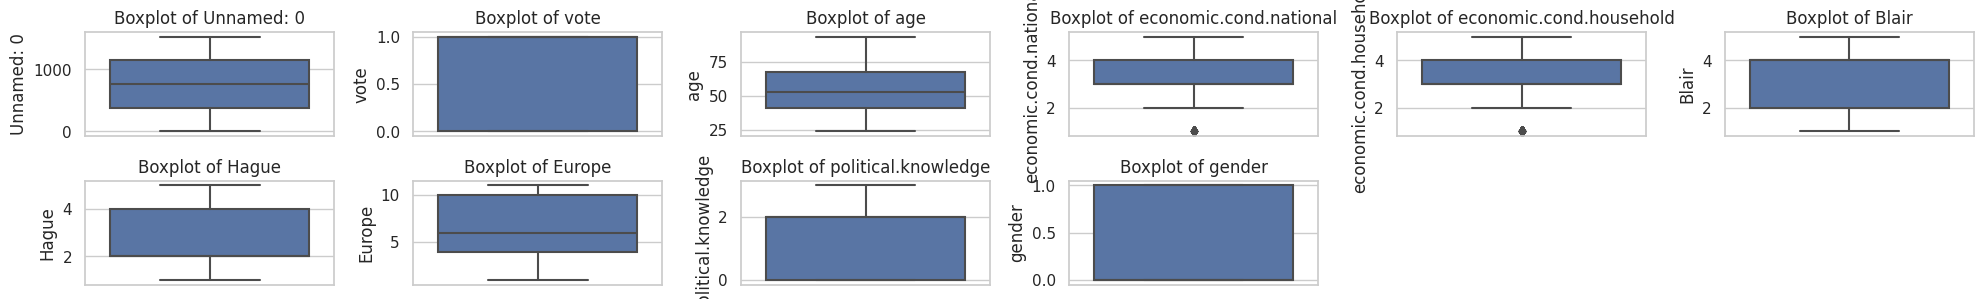

In [ ]:
plt.figure(figsize = (20,15))
feature_list = df.columns
for i in range(len(feature_list)):
    plt.subplot(10, 6, i + 1)
    sns.boxplot(y = df [feature_list[i]], data = df)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [ ]:
def remove_outliers(col):
  q1,q3=col.quantile([0.25,0.75])
  IQR=q3-q1
  LL=q1-(1.5*IQR)
  UL=q3+(1.5*IQR)
  return LL, UL

In [ ]:
for i in df.columns:
  LL,UL = remove_outliers(df[i])
  df[i]=np.where(df[i]>UL, UL , df[i])
  df[i]=np.where(df[i]<LL, LL , df[i])


In [ ]:
df

Unnamed: 0  vote   age  economic.cond.national  economic.cond.household  \
0            1.0   1.0  43.0                     3.0                      3.0   
1            2.0   1.0  36.0                     4.0                      4.0   
2            3.0   1.0  35.0                     4.0                      4.0   
3            4.0   1.0  24.0                     4.0                      2.0   
4            5.0   1.0  41.0                     2.0                      2.0   
...          ...   ...   ...                     ...                      ...   
1520      1521.0   0.0  67.0                     5.0                      3.0   
1521      1522.0   0.0  73.0                     2.0                      2.0   
1522      1523.0   1.0  37.0                     3.0                      3.0   
1523      1524.0   0.0  61.0                     3.0                      3.0   
1524      1525.0   0.0  74.0                     2.0                      3.0   

      Blair  Hague  Europe  political.knowledge  gender  
0       4.0    1.0     2.0                  2.0     0.0  
1       4.0    4.0     5.0                  2.0     1.0  
2       5.0    2.0     3.0                  2.0     1.0  
3       2.0    1.0     4.0                  0.0     0.0  
4       1.0    1.0     6.0                  2.0     1.0  
...     ...    ...     ...                  ...     ...  
1520    2.0    4.0    11.0                  3.0     1.0  
1521    4.0    4.0     8.0                  2.0     1.0  
1522    5.0    4.0     2.0                  2.0     1.0  
1523    1.0    4.0    11.0                  2.0     1.0  
1524    2.0    4.0    11.0                  0.0     0.0  

[1525 rows x 10 columns]

In [ ]:
df.describe().T

count        mean         std   min    25%    50%  \
Unnamed: 0               1525.0  763.000000  440.373894   1.0  382.0  763.0   
vote                     1525.0    0.697049    0.459685   0.0    0.0    1.0   
age                      1525.0   54.182295   15.711209  24.0   41.0   53.0   
economic.cond.national   1525.0    3.258033    0.852938   1.5    3.0    3.0   
economic.cond.household  1525.0    3.161639    0.885286   1.5    3.0    3.0   
Blair                    1525.0    3.334426    1.174824   1.0    2.0    4.0   
Hague                    1525.0    2.746885    1.230703   1.0    2.0    2.0   
Europe                   1525.0    6.728525    3.297538   1.0    4.0    6.0   
political.knowledge      1525.0    1.542295    1.083315   0.0    0.0    2.0   
gender                   1525.0    0.467541    0.499109   0.0    0.0    0.0   

                            75%     max  
Unnamed: 0               1144.0  1525.0  
vote                        1.0     1.0  
age                        67.0    93.0  
economic.cond.national      4.0     5.0  
economic.cond.household     4.0     5.0  
Blair                       4.0     5.0  
Hague                       4.0     5.0  
Europe                     10.0    11.0  
political.knowledge         2.0     3.0  
gender                      1.0     1.0

In [ ]:
df.head()

Unnamed: 0  vote   age  economic.cond.national  economic.cond.household  \
0         1.0   1.0  43.0                     3.0                      3.0   
1         2.0   1.0  36.0                     4.0                      4.0   
2         3.0   1.0  35.0                     4.0                      4.0   
3         4.0   1.0  24.0                     4.0                      2.0   
4         5.0   1.0  41.0                     2.0                      2.0   

   Blair  Hague  Europe  political.knowledge  gender  
0    4.0    1.0     2.0                  2.0     0.0  
1    4.0    4.0     5.0                  2.0     1.0  
2    5.0    2.0     3.0                  2.0     1.0  
3    2.0    1.0     4.0                  0.0     0.0  
4    1.0    1.0     6.0                  2.0     1.0

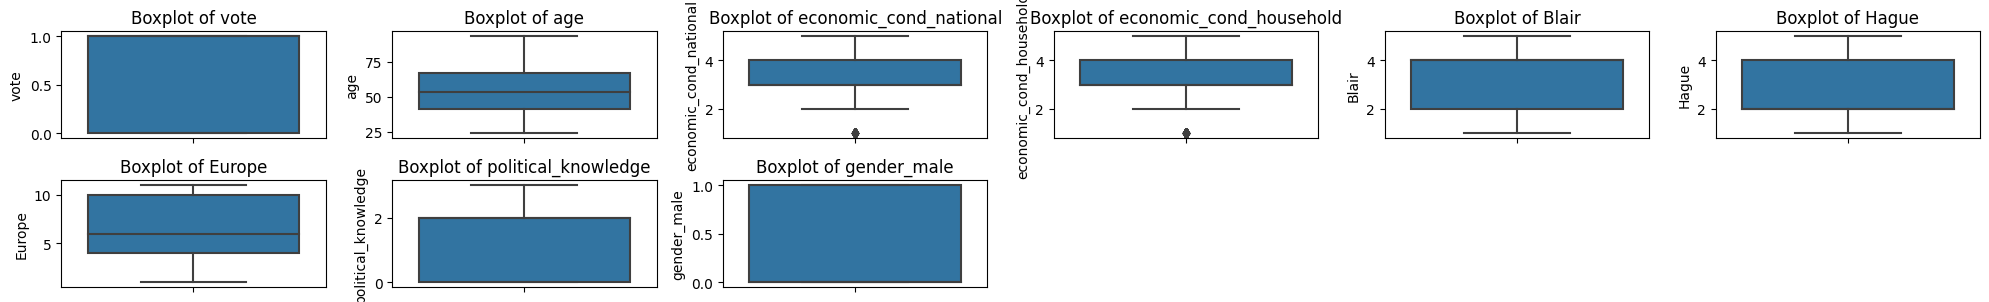

In [27]:
plt.figure(figsize = (20,15))
feature_list = df.columns
for i in range(len(feature_list)):
    plt.subplot(10, 6, i + 1)
    sns.boxplot(y = df [feature_list[i]], data = df)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

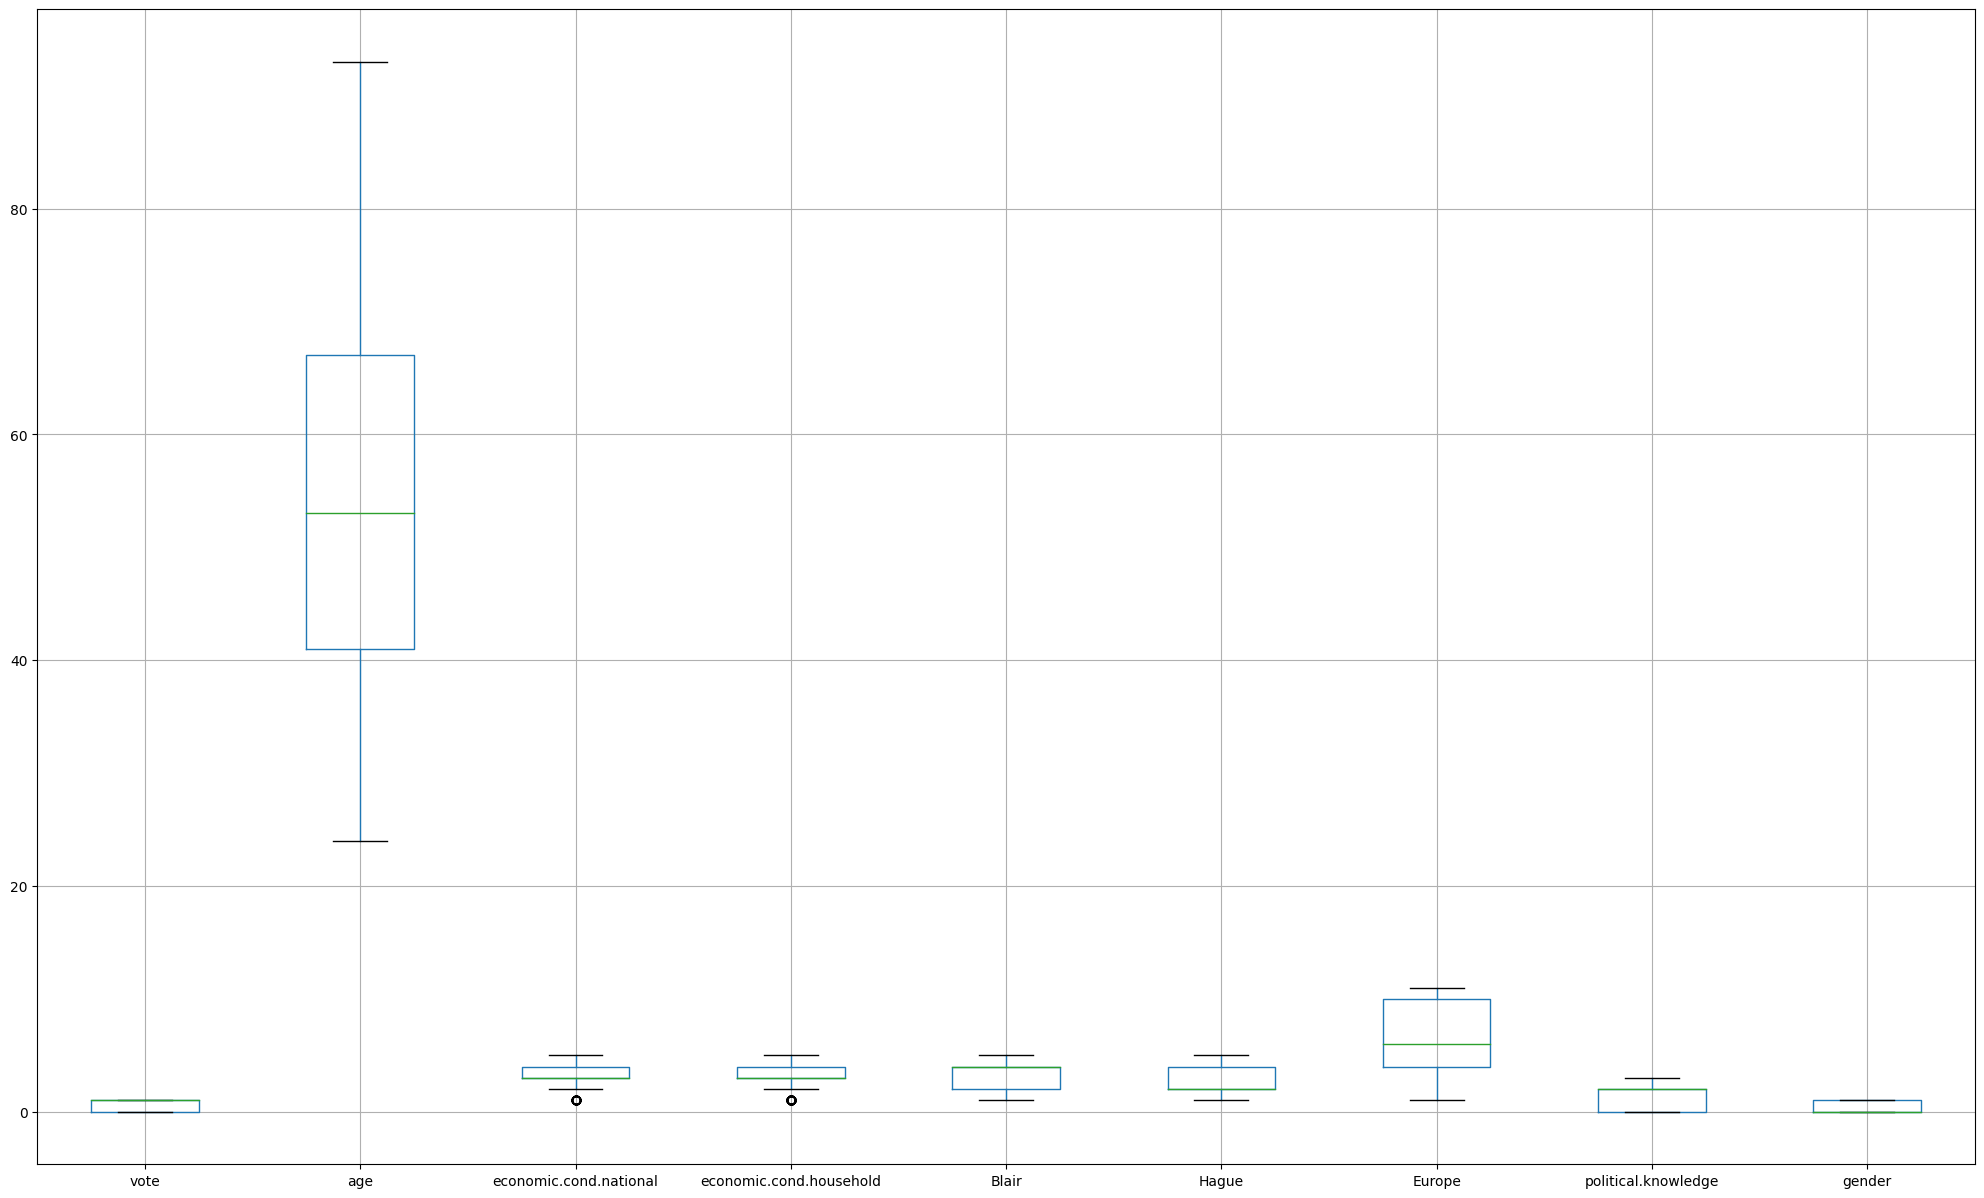

In [ ]:
plt.figure(figsize=(25,15))
df.boxplot()
plt.show()

In [34]:
df.dtypes

vote                       int64
age                        int64
economic_cond_national     int64
economic_cond_household    int64
Blair                      int64
Hague                      int64
Europe                     int64
political_knowledge        int64
gender_male                uint8
dtype: object

In [35]:
cat1=[]
num1=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat1.append(i)
    else:
        num1.append(i)
print(cat1)
print(num1)

[]
['vote', 'age', 'economic_cond_national', 'economic_cond_household', 'Blair', 'Hague', 'Europe', 'political_knowledge', 'gender_male']


In [36]:
print (num1)

['vote', 'age', 'economic_cond_national', 'economic_cond_household', 'Blair', 'Hague', 'Europe', 'political_knowledge', 'gender_male']


### Univariate Analysis

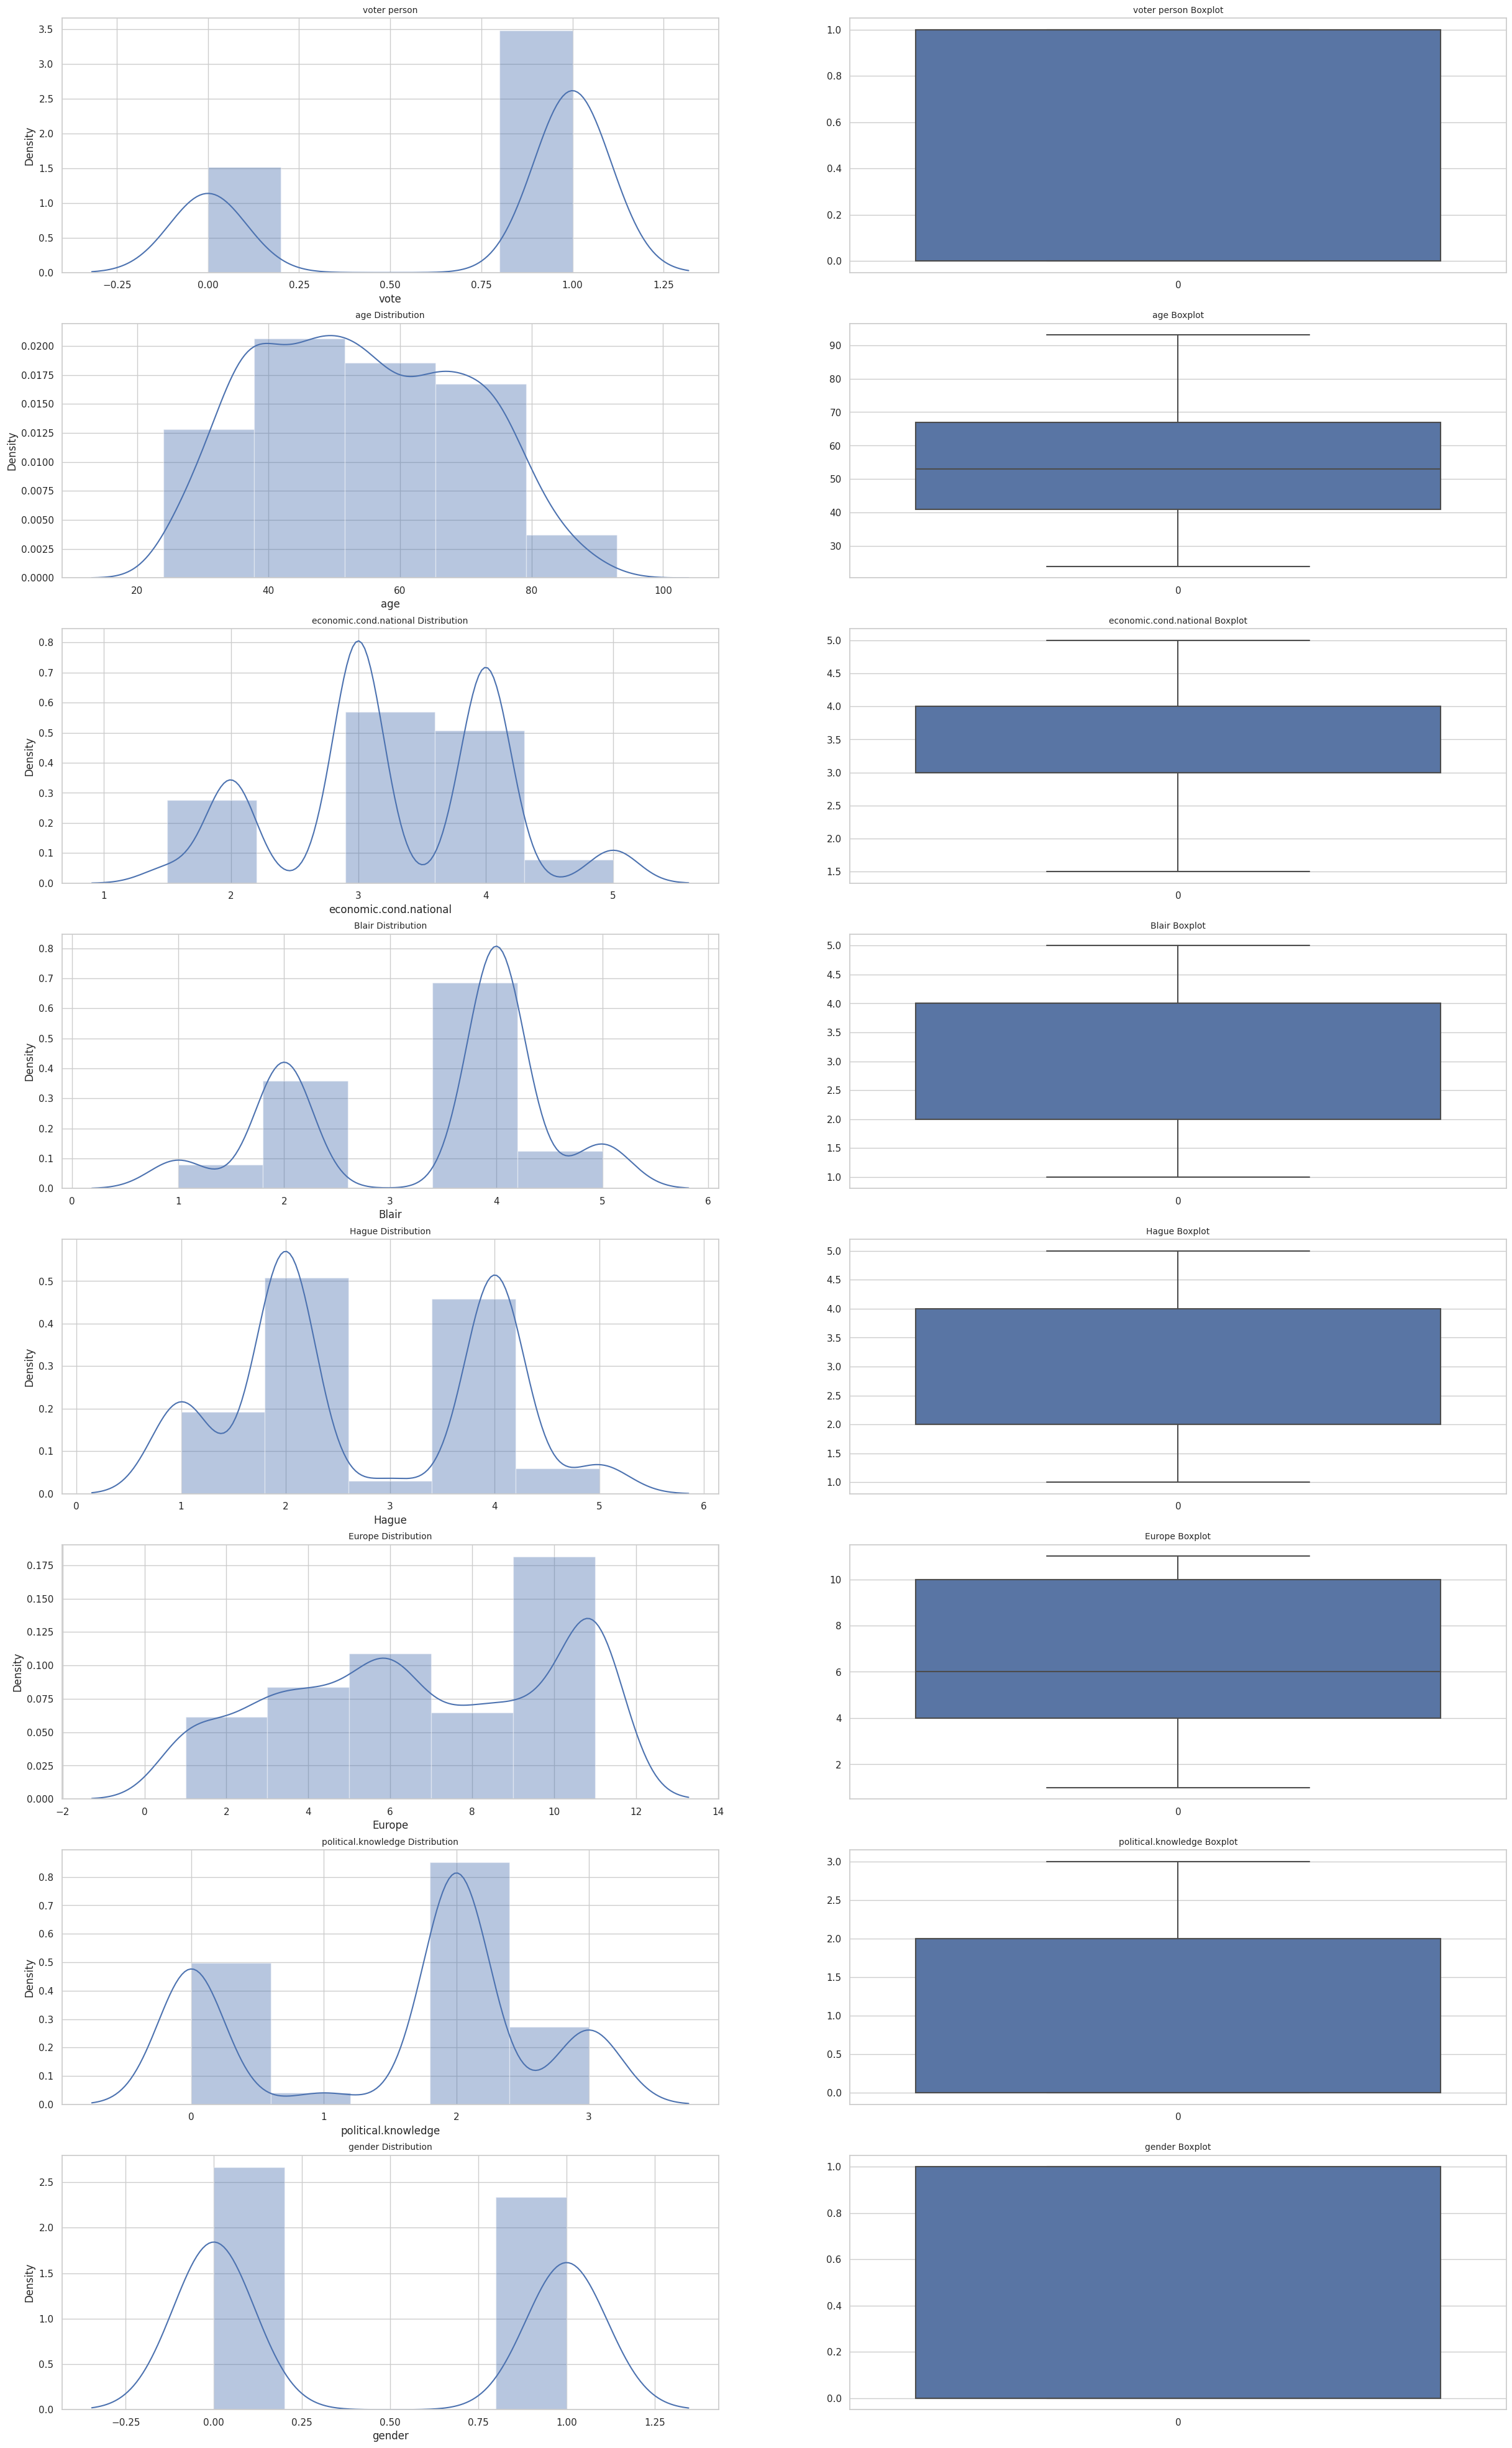

In [ ]:
fig, axes = plt.subplots(nrows=8,ncols=2)
fig.set_size_inches(30,50)
a = sns.distplot(df['vote'] , ax=axes[0][0],bins=5);
a.set_title("voter person",fontsize=10)

a = sns.boxplot(df['vote'] , orient = "v" , ax=axes[0][1]);
a.set_title("voter person Boxplot",fontsize=10)

a = sns.distplot(df['age'] ,bins=5, ax=axes[1][0]);
a.set_title("age Distribution",fontsize=10)

a = sns.boxplot(df['age'] , orient = "v" , ax=axes[1][1]);
a.set_title("age Boxplot",fontsize=10)


a = sns.distplot(df['economic.cond.national'] ,bins=5, ax=axes[2][0]);
a.set_title("economic.cond.national Distribution",fontsize=10)

a = sns.boxplot(df['economic.cond.national'] , orient = "v" , ax=axes[2][1]);
a.set_title("economic.cond.national Boxplot",fontsize=10)


a = sns.distplot(df['Blair'] ,bins=5, ax=axes[3][0]);
a.set_title("Blair Distribution",fontsize=10)

a = sns.boxplot(df['Blair'] , orient = "v" , ax=axes[3][1])
a.set_title("Blair Boxplot",fontsize=10)

a = sns.distplot(df['Hague'] ,bins=5, ax=axes[4][0]);
a.set_title("Hague Distribution",fontsize=10)

a = sns.boxplot(df['Hague'] , orient = "v" , ax=axes[4][1]);
a.set_title("Hague Boxplot",fontsize=10)

a = sns.distplot(df['Europe'] ,bins=5, ax=axes[5][0]);
a.set_title("Europe Distribution",fontsize=10)

a = sns.boxplot(df['Europe'] , orient = "v" , ax=axes[5][1]);
a.set_title("Europe Boxplot",fontsize=10)

a = sns.distplot(df['political.knowledge'] ,bins=5, ax=axes[6][0]);
a.set_title("political.knowledge Distribution",fontsize=10)

a = sns.boxplot(df['political.knowledge'] , orient = "v" , ax=axes[6][1]);
a.set_title("political.knowledge Boxplot",fontsize=10)

a = sns.distplot(df['gender'] ,bins=5, ax=axes[7][0]);
a.set_title("gender Distribution",fontsize=10)

a = sns.boxplot(df['gender'] , orient = "v" , ax=axes[7][1]);
a.set_title("gender Boxplot",fontsize=10)

plt.show()

BI-VARIATE ANALYSIS

In [36]:
print(num1)

['vote', 'age', 'economic_cond_national', 'economic_cond_household', 'Blair', 'Hague', 'Europe', 'political_knowledge', 'gender_male']


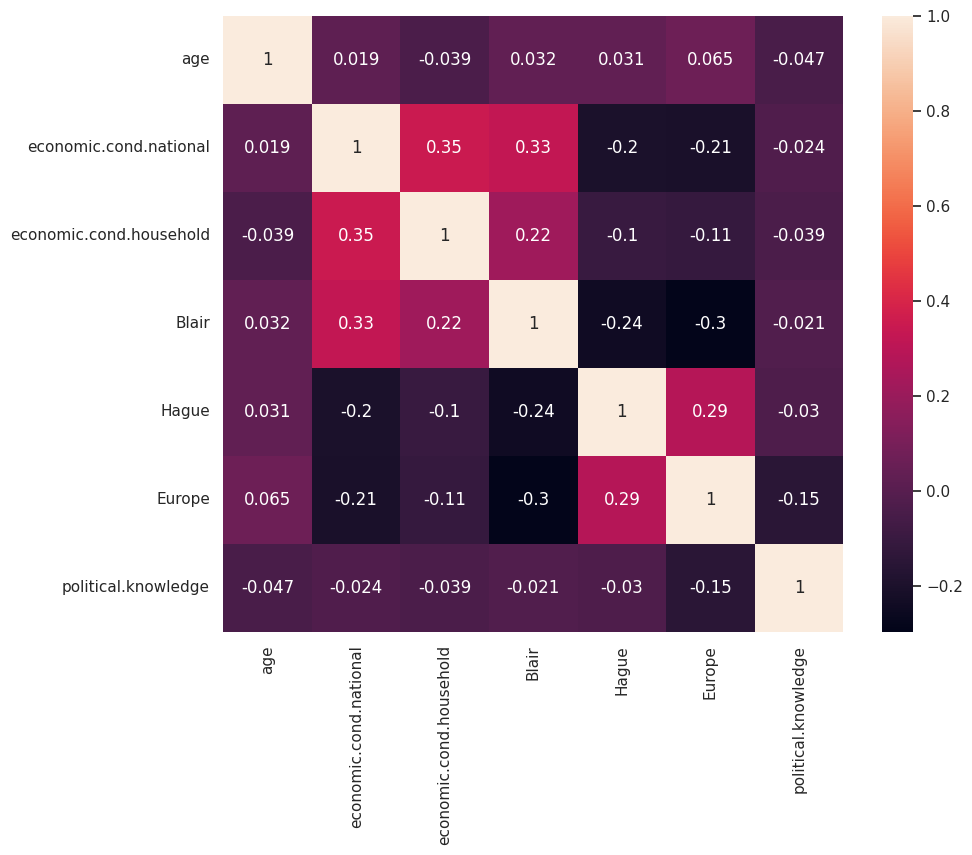

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

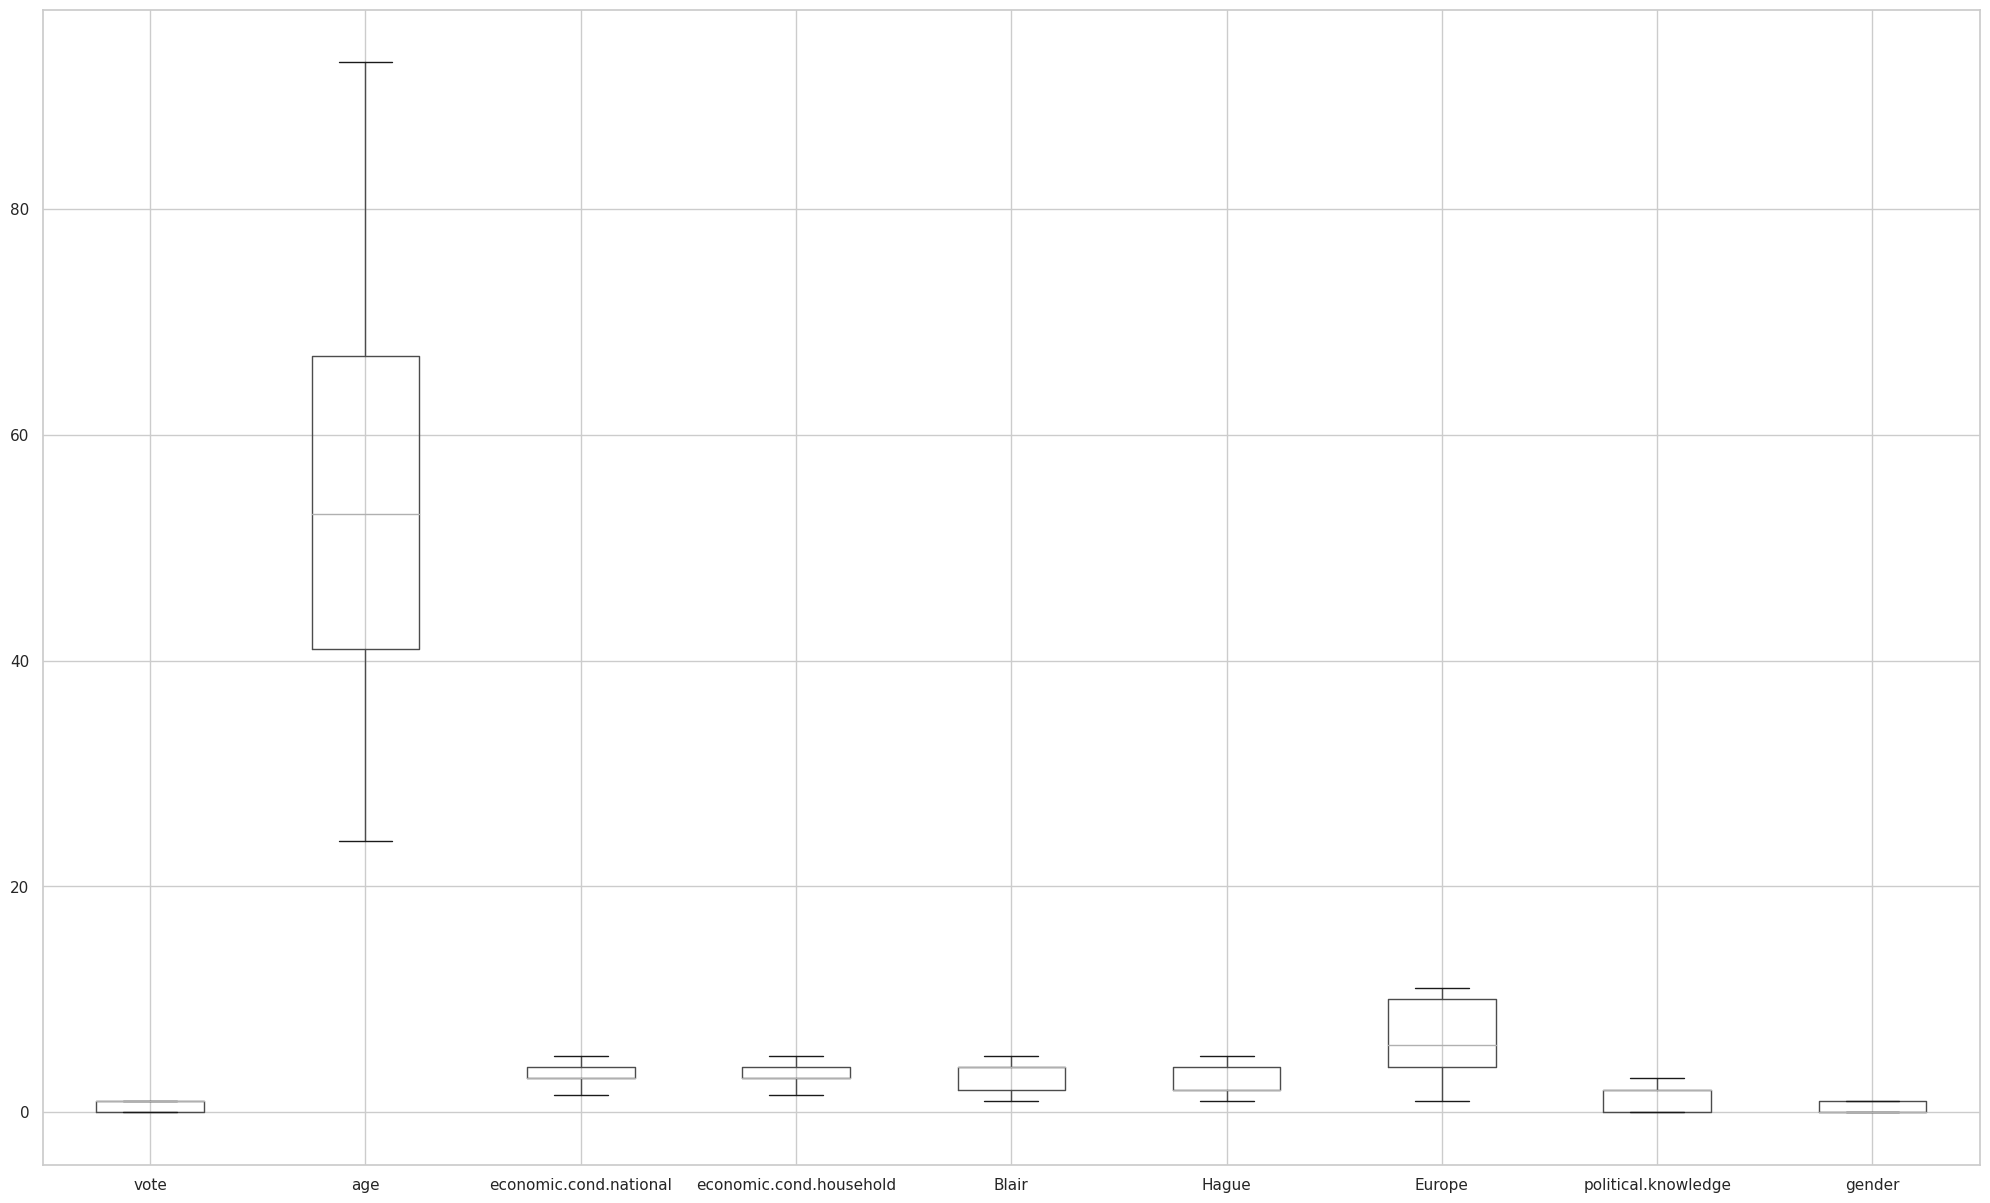

In [ ]:
plt.figure(figsize=(25,15))
df.boxplot()
plt.show()

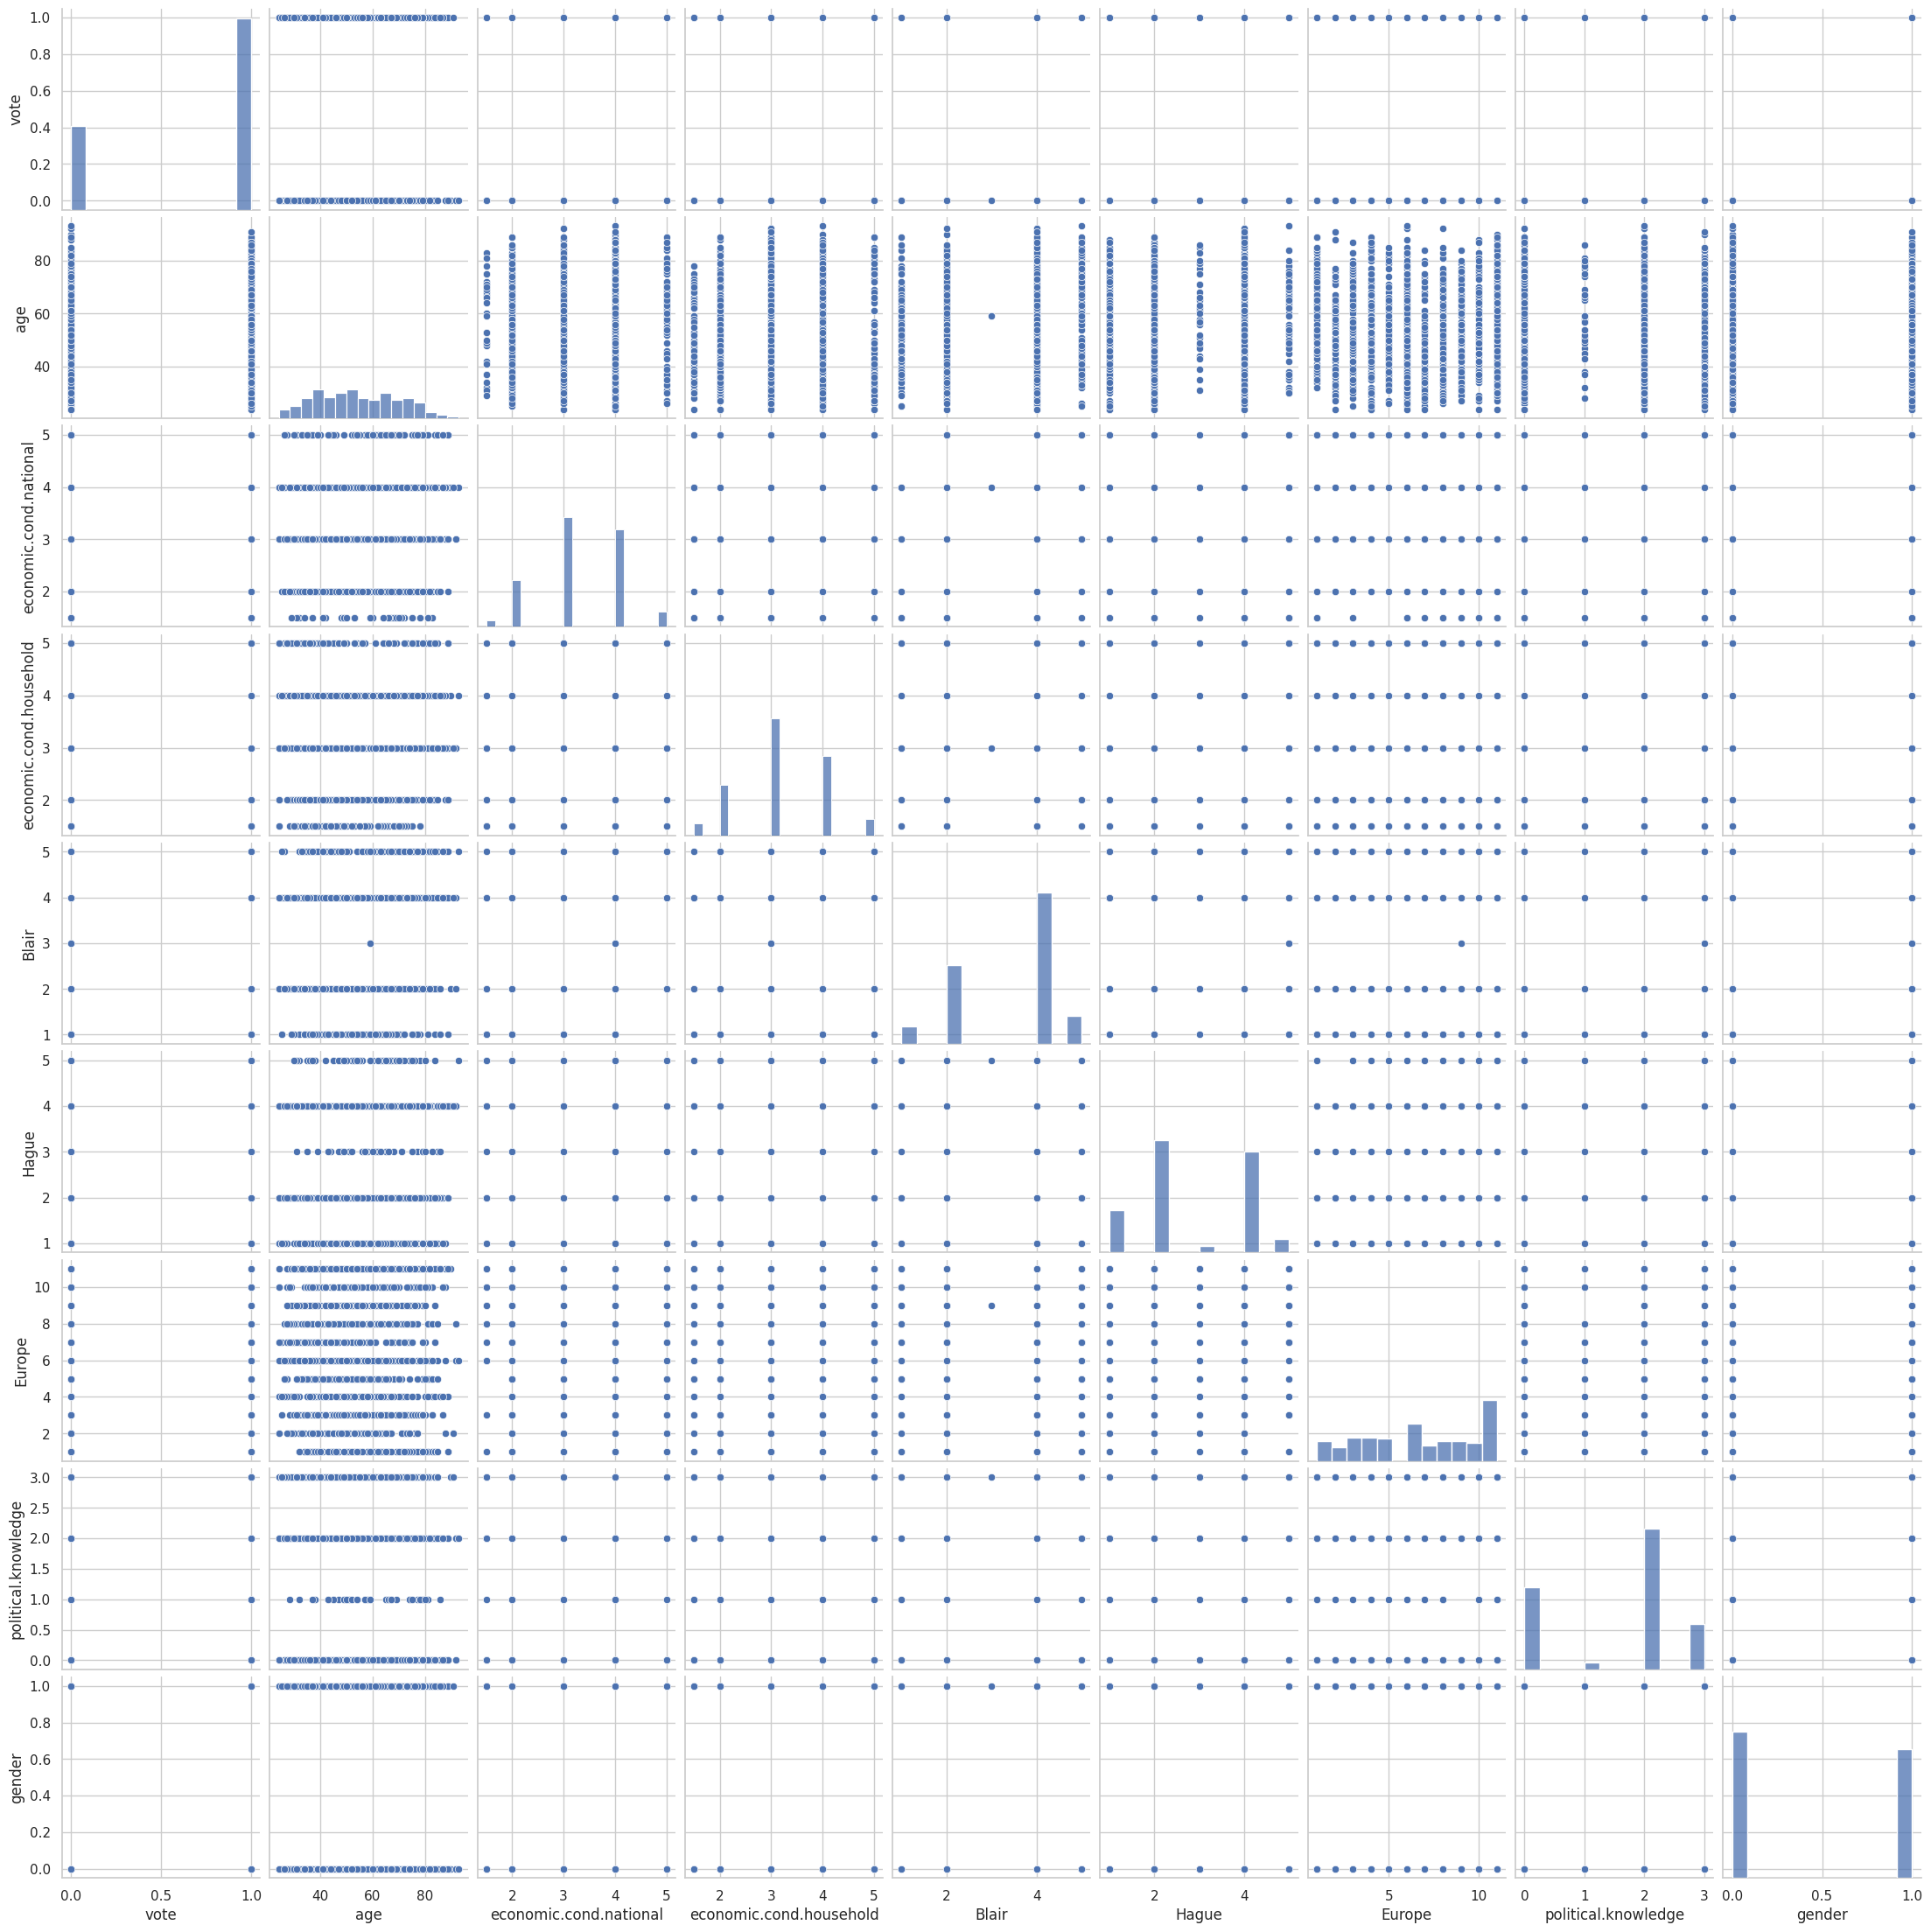

In [ ]:
sns.pairplot(df)

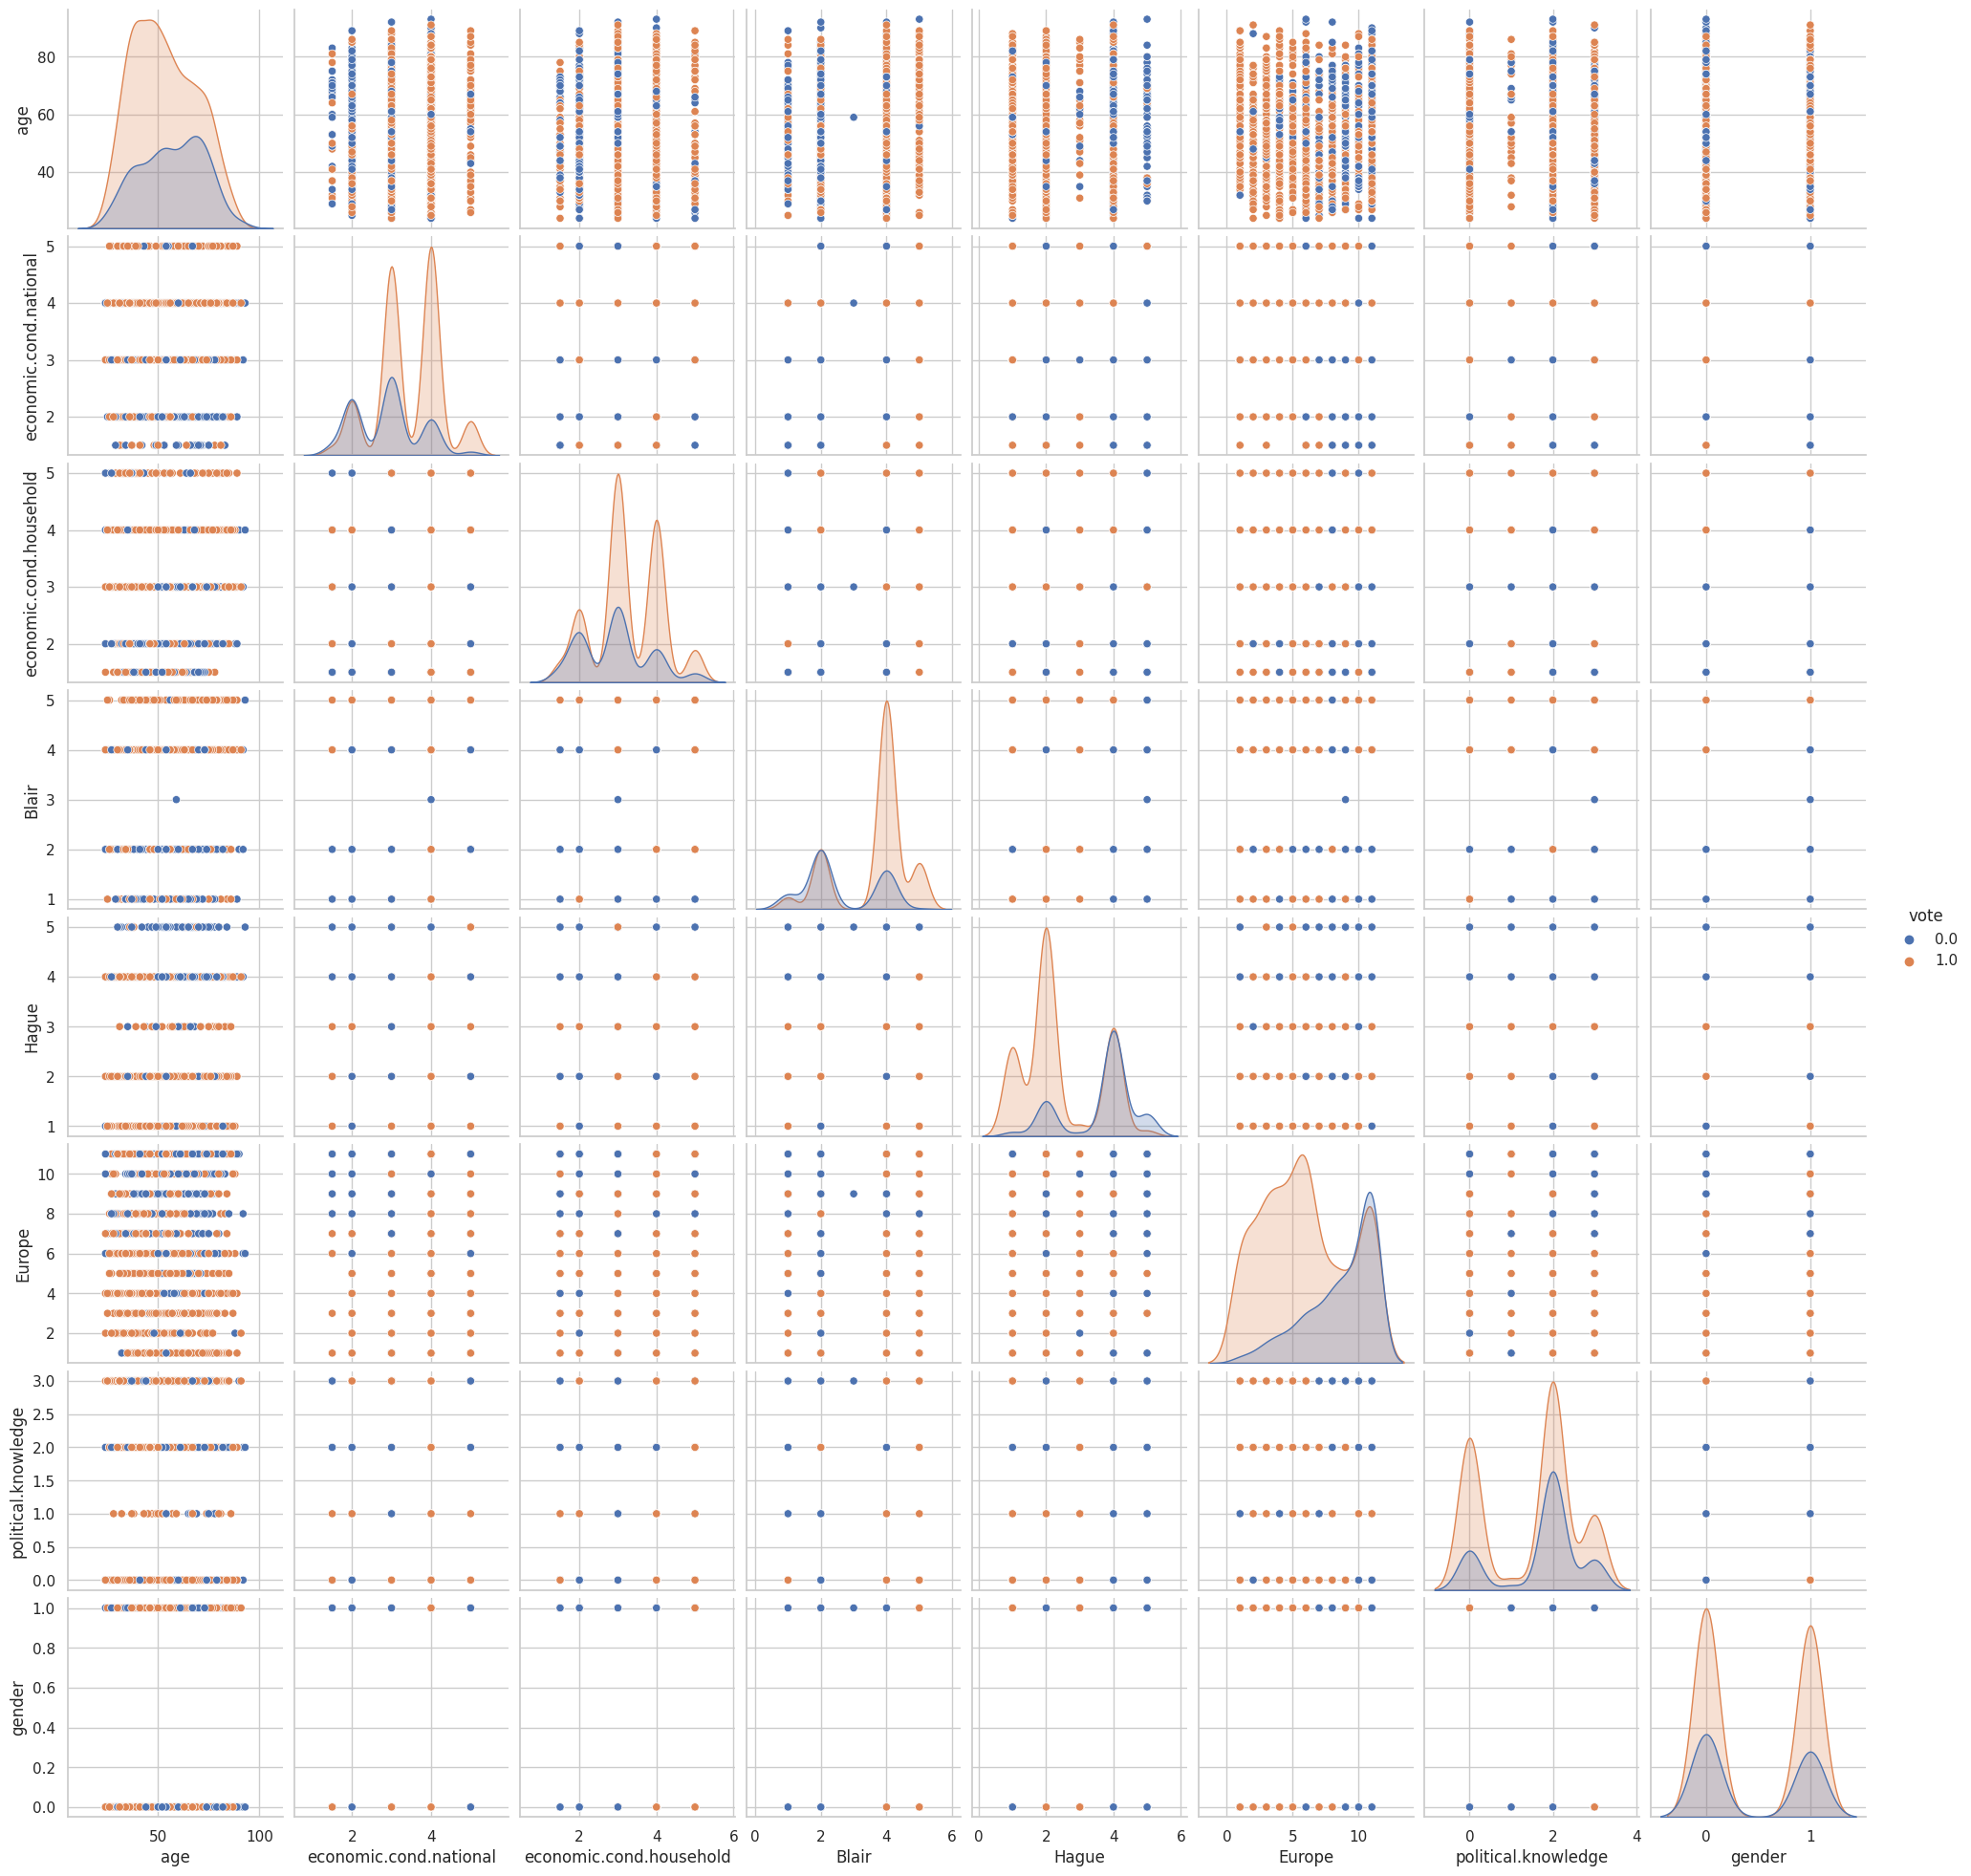

In [ ]:
# Pairplot using sns

sns.pairplot(df , hue='vote' , diag_kind = 'kde');

In [31]:
df.head()

vote  age  economic_cond_national  economic_cond_household  Blair  Hague  \
0     1   43                       3                        3      4      1   
1     1   36                       4                        4      4      4   
2     1   35                       4                        4      5      2   
3     1   24                       4                        2      2      1   
4     1   41                       2                        2      1      1   

   Europe  political_knowledge  gender_male  
0       2                    2            0  
1       5                    2            1  
2       3                    2            1  
3       4                    0            0  
4       6                    2            1

In [37]:
# Method III Min-Max method
from sklearn.preprocessing import MinMaxScaler
# build the scaler model
scaler = MinMaxScaler().fit(df[num1])
# transform the test test
data_minmax = scaler.transform(df[num1])
data_minmax=pd.DataFrame(data_minmax, columns=df[num1].columns)
data_minmax.describe()

vote          age  economic_cond_national  \
count  1517.000000  1517.000000             1517.000000   
mean      0.696770     0.438279                0.561305   
std       0.459805     0.227561                0.220448   
min       0.000000     0.000000                0.000000   
25%       0.000000     0.246377                0.500000   
50%       1.000000     0.420290                0.500000   
75%       1.000000     0.623188                0.750000   
max       1.000000     1.000000                1.000000   

       economic_cond_household        Blair        Hague       Europe  \
count              1517.000000  1517.000000  1517.000000  1517.000000   
mean                  0.534443     0.583883     0.437376     0.574028   
std                   0.232767     0.293693     0.308120     0.329904   
min                   0.000000     0.000000     0.000000     0.000000   
25%                   0.500000     0.250000     0.250000     0.300000   
50%                   0.500000     0.750000     0.250000     0.500000   
75%                   0.750000     0.750000     0.750000     0.900000   
max                   1.000000     1.000000     1.000000     1.000000   

       political_knowledge  gender_male  
count          1517.000000  1517.000000  
mean              0.513514     0.467370  
std               0.361472     0.499099  
min               0.000000     0.000000  
25%               0.000000     0.000000  
50%               0.666667     0.000000  
75%               0.666667     1.000000  
max               1.000000     1.000000

In [38]:
data_minmax

vote       age  economic_cond_national  economic_cond_household  Blair  \
0      1.0  0.275362                    0.50                     0.50   0.75   
1      1.0  0.173913                    0.75                     0.75   0.75   
2      1.0  0.159420                    0.75                     0.75   1.00   
3      1.0  0.000000                    0.75                     0.25   0.25   
4      1.0  0.246377                    0.25                     0.25   0.00   
...    ...       ...                     ...                      ...    ...   
1512   0.0  0.623188                    1.00                     0.50   0.25   
1513   0.0  0.710145                    0.25                     0.25   0.75   
1514   1.0  0.188406                    0.50                     0.50   1.00   
1515   0.0  0.536232                    0.50                     0.50   0.00   
1516   0.0  0.724638                    0.25                     0.50   0.25   

      Hague  Europe  political_knowledge  gender_male  
0      0.00     0.1             0.666667          0.0  
1      0.75     0.4             0.666667          1.0  
2      0.25     0.2             0.666667          1.0  
3      0.00     0.3             0.000000          0.0  
4      0.00     0.5             0.666667          1.0  
...     ...     ...                  ...          ...  
1512   0.75     1.0             1.000000          1.0  
1513   0.75     0.7             0.666667          1.0  
1514   0.75     0.1             0.666667          1.0  
1515   0.75     1.0             0.666667          1.0  
1516   0.75     1.0             0.000000          0.0  

[1517 rows x 9 columns]

In [39]:
from scipy.stats import zscore

In [40]:
data_scale=df.apply(zscore)

In [41]:
data_scale.describe().T

count          mean      std       min       25%  \
vote                     1517.0 -7.494188e-17  1.00033 -1.515858 -1.515858   
age                      1517.0 -9.367735e-18  1.00033 -1.926617 -0.843577   
economic_cond_national   1517.0  1.967224e-16  1.00033 -2.547041 -0.278185   
economic_cond_household  1517.0 -1.077290e-16  1.00033 -2.296796 -0.148020   
Blair                    1517.0  3.747094e-17  1.00033 -1.988727 -1.137217   
Hague                    1517.0  1.053870e-16  1.00033 -1.419969 -0.608329   
Europe                   1517.0  4.332578e-17  1.00033 -1.740556 -0.830902   
political_knowledge      1517.0 -4.215481e-17  1.00033 -1.421084 -1.421084   
gender_male              1517.0 -9.367735e-18  1.00033 -0.936736 -0.936736   

                              50%       75%       max  
vote                     0.659692  0.659692  0.659692  
age                     -0.079079  0.812836  2.469250  
economic_cond_national  -0.278185  0.856242  1.990670  
economic_cond_household -0.148020  0.926367  2.000755  
Blair                    0.565802  0.565802  1.417312  
Hague                   -0.608329  1.014951  1.826592  
Europe                  -0.224465  0.988407  1.291625  
political_knowledge      0.423832  0.423832  1.346290  
gender_male             -0.936736  1.067536  1.067536

In [ ]:
data_scale

vote       age  economic_cond_national  economic_cond_household  \
0     0.659692 -0.716161               -0.278185                -0.148020   
1     0.659692 -1.162118                0.856242                 0.926367   
2     0.659692 -1.225827                0.856242                 0.926367   
3     0.659692 -1.926617                0.856242                -1.222408   
4     0.659692 -0.843577               -1.412613                -1.222408   
...        ...       ...                     ...                      ...   
1520 -1.515858  0.812836                1.990670                -0.148020   
1521 -1.515858  1.195085               -1.412613                -1.222408   
1522  0.659692 -1.098410               -0.278185                -0.148020   
1523 -1.515858  0.430587               -0.278185                -0.148020   
1524 -1.515858  1.258794               -1.412613                -0.148020   

         Blair     Hague    Europe  political_knowledge  gender_male  
0     0.565802 -1.419969 -1.437338             0.423832    -0.936736  
1     0.565802  1.014951 -0.527684             0.423832     1.067536  
2     1.417312 -0.608329 -1.134120             0.423832     1.067536  
3    -1.137217 -1.419969 -0.830902            -1.421084    -0.936736  
4    -1.988727 -1.419969 -0.224465             0.423832     1.067536  
...        ...       ...       ...                  ...          ...  
1520 -1.137217  1.014951  1.291625             1.346290     1.067536  
1521  0.565802  1.014951  0.381971             0.423832     1.067536  
1522  1.417312  1.014951 -1.437338             0.423832     1.067536  
1523 -1.988727  1.014951  1.291625             0.423832     1.067536  
1524 -1.137217  1.014951  1.291625            -1.421084    -0.936736  

[1517 rows x 9 columns]

In [43]:
# import module
from sklearn.preprocessing import StandardScaler

In [44]:
# Creating a copy of the original data frame
df_copy = data_minmax.copy()

In [45]:
# Copy all the predictor variables into X dataframe
X = data_minmax.drop('vote', axis=1)

# Copy target into the y dataframe.
y = data_minmax[['vote']]

In [46]:
X.head()

age  economic_cond_national  economic_cond_household  Blair  Hague  \
0  0.275362                    0.50                     0.50   0.75   0.00   
1  0.173913                    0.75                     0.75   0.75   0.75   
2  0.159420                    0.75                     0.75   1.00   0.25   
3  0.000000                    0.75                     0.25   0.25   0.00   
4  0.246377                    0.25                     0.25   0.00   0.00   

   Europe  political_knowledge  gender_male  
0     0.1             0.666667          0.0  
1     0.4             0.666667          1.0  
2     0.2             0.666667          1.0  
3     0.3             0.000000          0.0  
4     0.5             0.666667          1.0

In [47]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

Linear regression

In [45]:
# invoke the LinearRegression function and find the bestfit model on training data

import statsmodels.api as sm

In [46]:
X_train=sm.add_constant(X_train)# This adds the constant term beta0 to the Simple Linear Regression.
X_test=sm.add_constant(X_test)

In [60]:
X_train.describe().T

count      mean       std  min      25%       50%  \
const                    1061.0  1.000000  0.000000  1.0  1.00000  1.000000   
age                      1061.0  0.436763  0.225165  0.0  0.26087  0.420290   
economic_cond_national   1061.0  0.561970  0.214428  0.0  0.50000  0.500000   
economic_cond_household  1061.0  0.538407  0.234666  0.0  0.50000  0.500000   
Blair                    1061.0  0.589303  0.292155  0.0  0.25000  0.750000   
Hague                    1061.0  0.432846  0.308340  0.0  0.25000  0.250000   
Europe                   1061.0  0.565881  0.326047  0.0  0.30000  0.500000   
political_knowledge      1061.0  0.504555  0.358639  0.0  0.00000  0.666667   
gender_male              1061.0  0.467484  0.499177  0.0  0.00000  0.000000   

                              75%  max  
const                    1.000000  1.0  
age                      0.623188  1.0  
economic_cond_national   0.750000  1.0  
economic_cond_household  0.750000  1.0  
Blair                    0.750000  1.0  
Hague                    0.750000  1.0  
Europe                   0.900000  1.0  
political_knowledge      0.666667  1.0  
gender_male              1.000000  1.0

In [61]:
X_test.describe().T

count      mean       std  min       25%       50%  \
const                    456.0  1.000000  0.000000  1.0  1.000000  1.000000   
age                      456.0  0.441807  0.233256  0.0  0.231884  0.434783   
economic_cond_national   456.0  0.559759  0.234094  0.0  0.500000  0.500000   
economic_cond_household  456.0  0.525219  0.228276  0.0  0.500000  0.500000   
Blair                    456.0  0.571272  0.297180  0.0  0.250000  0.750000   
Hague                    456.0  0.447917  0.307687  0.0  0.250000  0.250000   
Europe                   456.0  0.592982  0.338314  0.0  0.300000  0.600000   
political_knowledge      456.0  0.534357  0.367533  0.0  0.000000  0.666667   
gender_male              456.0  0.467105  0.499465  0.0  0.000000  0.000000   

                              75%       max  
const                    1.000000  1.000000  
age                      0.637681  0.942029  
economic_cond_national   0.750000  1.000000  
economic_cond_household  0.750000  1.000000  
Blair                    0.750000  1.000000  
Hague                    0.750000  1.000000  
Europe                   0.925000  1.000000  
political_knowledge      0.666667  1.000000  
gender_male              1.000000  1.000000

In [71]:
 #This adds the constant term beta0 to the Simple Linear Regression.
X_con=sm.add_constant(X)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_con, y, test_size=0.30 , random_state=1)

In [73]:
model = sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   vote   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     84.58
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          5.25e-108
Time:                        07:32:42   Log-Likelihood:                -402.94
No. Observations:                1061   AIC:                             823.9
Df Residuals:                    1052   BIC:                             868.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.8157      0.058     13.992      0.000       0.701       0.930
age                        -0.1733      0.049     -3.549      0.000      -0.269      -0.078
economic_cond_national      0.3034      0.056      5.423      0.000       0.194       0.413
economic_cond_household     0.0251      0.050      0.507      0.612      -0.072       0.122
Blair                       0.3723      0.041      9.047      0.000       0.292       0.453
Hague                      -0.4647      0.038    -12.366      0.000      -0.538      -0.391
Europe                     -0.2804      0.036     -7.694      0.000      -0.352      -0.209
political_knowledge        -0.1619      0.031     -5.193      0.000      -0.223      -0.101
gender_male                 0.0187      0.022      0.839      0.402      -0.025       0.062
==============================================================================
Omnibus:                       24.713   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.961
Skew:                          -0.375   Prob(JB):                     2.31e-06
Kurtosis:                       2.844   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                      28.569042
age                         1.015654
economic_cond_national      1.208367
economic_cond_household     1.133530
Blair                       1.214217
Hague                       1.127716
Europe                      1.185442
political_knowledge         1.049427
gender_male                 1.039776
dtype: float64



In [76]:
ypred = model.predict(X_test)
print(ypred)

503     0.534588
368     0.749546
1071    1.147783
1027    0.286684
1322    0.868412
          ...   
561     0.948367
925     0.460278
275     0.958193
1124    0.893642
1147    0.945656
Length: 456, dtype: float64


In [77]:
print("The Root Mean Square Error (RMSE) of the model is for testing set is",np.sqrt(mean_squared_error(y_test,ypred)))

The Root Mean Square Error (RMSE) of the model is for testing set is 0.3622858652340443


In [78]:
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [79]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

In [80]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

### Training Data and Test Data Confusion Matrix Comparison

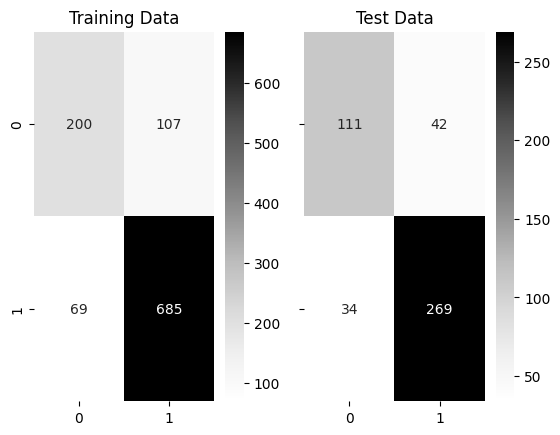

In [81]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


In [91]:
# Let us write the equation of linear regression
Equation = "usr ="
print(Equation, end=" ")
for i in range(len(X_train.columns)):
    if i == 0:
        print(olsmod_6.params[i], "+", end=" ")
    elif i != len(X_train.columns) - 1:
        print(
            olsmod_6.params[i],
            "* (",
            X_train.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsmod_6.params[i], "* (", X_train.columns[i], ")")

usr = 0.8156731537864652 + -0.17333835060235264 * ( age ) +  0.3033682104790156 * ( economic_cond_national ) +  0.025109677108676003 * ( economic_cond_household ) +  0.3723145377382221 * ( Blair ) +  -0.4647080673190488 * ( Hague ) +  -0.2803540095167645 * ( Europe ) +  -0.1618600153014007 * ( political_knowledge ) +  0.018690939212194044 * ( gender_male )


In [88]:
olsmod_6 = sm.OLS(y_train, X_train).fit()
print(olsmod_6.summary())

                            OLS Regression Results                            
Dep. Variable:                   vote   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     84.58
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          5.25e-108
Time:                        08:19:36   Log-Likelihood:                -402.94
No. Observations:                1061   AIC:                             823.9
Df Residuals:                    1052   BIC:                             868.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### Training Data and Test Data Classification Report Comparison

In [82]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       0.74      0.65      0.69       307
         1.0       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.77      0.73      0.74       153
         1.0       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456
 



In [53]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [54]:
model.explained_variance_ratio_

array([1.])

AUC for the Training Data: 0.889
AUC for the Test Data: 0.888


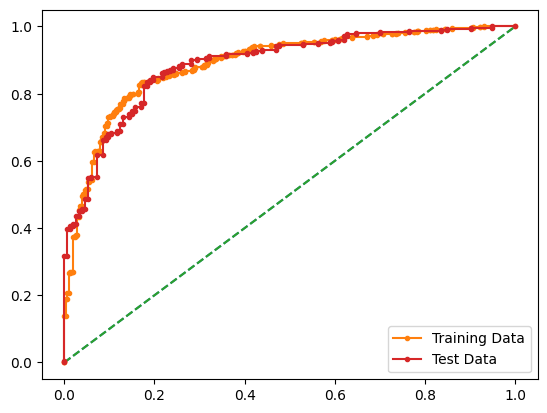

In [92]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

LOGISTIC REGRESSION

In [100]:
from sklearn.linear_model import LogisticRegression

In [101]:
# Copy all the predictor variables into X dataframe
X = df.drop('vote', axis=1)

# Copy target into the y dataframe.
y = df['vote']

In [102]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=df['vote'])

In [103]:
y_train.value_counts(1)

1    0.696513
0    0.303487
Name: vote, dtype: float64

In [104]:
y_test.value_counts(1)

1    0.697368
0    0.302632
Name: vote, dtype: float64

Logistic Regression Model

In [126]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

Predicting on Training and Test dataset

In [119]:
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

In [120]:
y_test_predict

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Getting the Predicted Classes and Probs

In [121]:
y_test_predict_prob=model.predict_proba(X_test)
pd.DataFrame(y_test_predict_prob).head()

0         1
0  0.199510  0.800490
1  0.610744  0.389256
2  0.083468  0.916532
3  0.030816  0.969184
4  0.135993  0.864007

## Model Evaluation

In [122]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np


# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [117]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.827521206409048

In [118]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.8552631578947368

In [111]:
# Accuracy - Training Data
model.score(X_test, y_test_predict)

1.0

AUC: 0.888


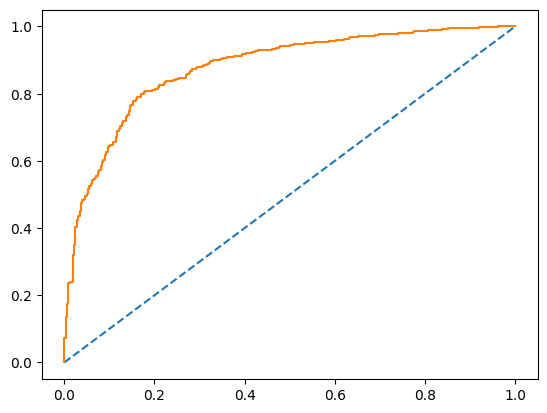

In [116]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve

test_fpr, test_tpr, test_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

AUC: 0.888


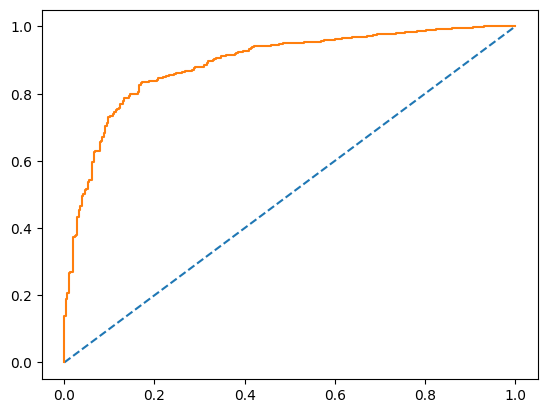

In [99]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

#####

AUC Value closer to 1 tells that there is good seperatibility between the predicted classes and thus the model is good for prediction

ROC Curve visually represents the above concept where the plot should be as far as possible from the diagnol.

AUC and ROC for the test data

AUC: 0.877


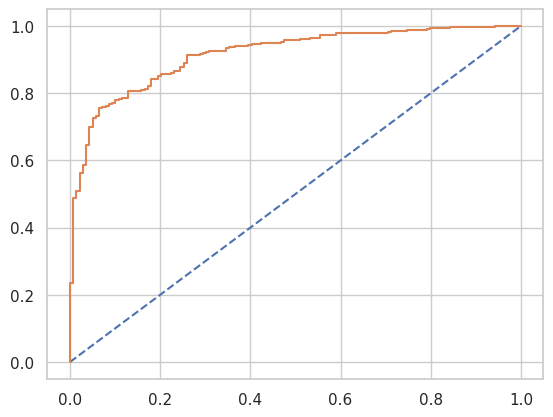

In [ ]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Confusion Matrix for the training data

In [74]:
from sklearn.metrics import confusion_matrix

In [133]:
confusion_matrix(y_train, y_train_predict)

array([[213, 109],
       [ 74, 665]])

In [134]:
confusion_matrix(y_train, y_train_predict)

array([[213, 109],
       [ 74, 665]])

In [135]:
confusion_matrix(y_test, y_test_predict)

array([[ 94,  44],
       [ 22, 296]])

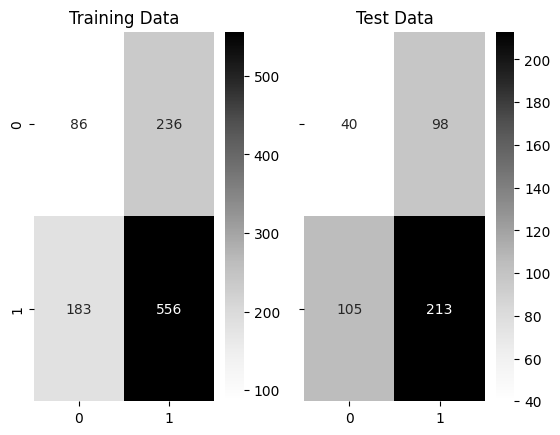

In [136]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [ ]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

         0.0       0.75      0.66      0.70       323
         1.0       0.86      0.91      0.88       744

    accuracy                           0.83      1067
   macro avg       0.81      0.78      0.79      1067
weighted avg       0.83      0.83      0.83      1067



In [ ]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

         0.0       0.80      0.68      0.73       139
         1.0       0.87      0.92      0.90       319

    accuracy                           0.85       458
   macro avg       0.83      0.80      0.81       458
weighted avg       0.85      0.85      0.85       458



Confusion Matrix for test data

In [ ]:
confusion_matrix(y_test, y_test_predict)

array([[ 94,  45],
       [ 24, 295]])

In [ ]:
optimal_idx = np.argmax(train_tpr-train_fpr)
optimal_threshold = train_thresholds[optimal_idx]
optimal_threshold

0.7104138373753764

In [ ]:
probs

array([0.91343368, 0.79204798, 0.93857231, ..., 0.92081677, 0.79934668,
       0.78735823])

## Applying GridSearchCV for Logistic Regression

In [ ]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [ ]:
model = LogisticRegression(max_iter=10000)

In [ ]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000), n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [ ]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'none', 'solver': 'lbfgs', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, penalty='none')


In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [ ]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.225953  0.774047
1  0.090054  0.909946
2  0.060530  0.939470
3  0.263878  0.736122
4  0.018824  0.981176

In [ ]:
from sklearn import linear_model
import statsmodels.api as sm

In [ ]:
import sklearn

In [ ]:
pip install scikit-learn

In [ ]:
 sklearn.metrics.ConfusionMatrixDisplay

sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay

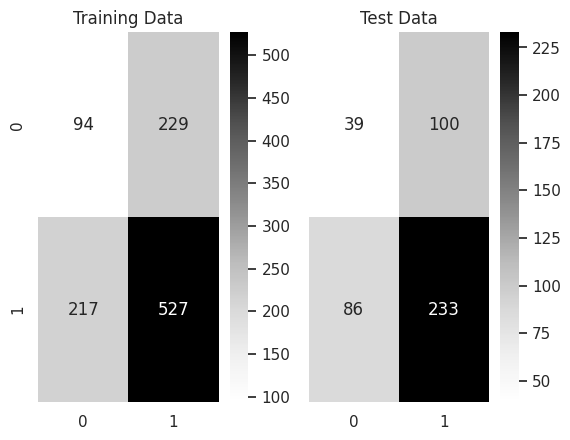

In [ ]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [137]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, ytest_predict).ravel()

NameError: ignored

In [ ]:
tn,fp,fn,tp

(94, 45, 24, 295)

In [ ]:
(tp+tn)/(tp+tn+fp+fn)# ACCURACY of predicting 0's and 1's correctly

0.8493449781659389

In [ ]:
tp/(tp+fp)#Precision for 1's

0.8676470588235294

In [ ]:
tp/(tp+fn)#Recall for 1's

0.9247648902821317

KNN MODEL


In [138]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

In [139]:
# Create a separate dataframe consisting only of the features i.e independent attributes

X = df.drop(labels= "vote" , axis = 1)
y = df["vote"]
X.head()

age  economic_cond_national  economic_cond_household  Blair  Hague  Europe  \
0   43                       3                        3      4      1       2   
1   36                       4                        4      4      4       5   
2   35                       4                        4      5      2       3   
3   24                       4                        2      2      1       4   
4   41                       2                        2      1      1       6   

   political_knowledge  gender_male  
0                    2            0  
1                    2            1  
2                    2            1  
3                    0            0  
4                    2            1

In [141]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.

XScaled  = X.apply(zscore)  # convert all attributes to Z scale

XScaled.describe()

age  economic_cond_national  economic_cond_household  \
count  1.517000e+03            1.517000e+03             1.517000e+03   
mean  -9.367735e-18            1.967224e-16            -1.077290e-16   
std    1.000330e+00            1.000330e+00             1.000330e+00   
min   -1.926617e+00           -2.547041e+00            -2.296796e+00   
25%   -8.435773e-01           -2.781853e-01            -1.480205e-01   
50%   -7.907881e-02           -2.781853e-01            -1.480205e-01   
75%    8.128361e-01            8.562424e-01             9.263674e-01   
max    2.469250e+00            1.990670e+00             2.000755e+00   

              Blair         Hague        Europe  political_knowledge  \
count  1.517000e+03  1.517000e+03  1.517000e+03         1.517000e+03   
mean   3.747094e-17  1.053870e-16  4.332578e-17        -4.215481e-17   
std    1.000330e+00  1.000330e+00  1.000330e+00         1.000330e+00   
min   -1.988727e+00 -1.419969e+00 -1.740556e+00        -1.421084e+00   
25%   -1.137217e+00 -6.083289e-01 -8.309016e-01        -1.421084e+00   
50%    5.658022e-01 -6.083289e-01 -2.244654e-01         4.238322e-01   
75%    5.658022e-01  1.014951e+00  9.884072e-01         4.238322e-01   
max    1.417312e+00  1.826592e+00  1.291625e+00         1.346290e+00   

        gender_male  
count  1.517000e+03  
mean  -9.367735e-18  
std    1.000330e+00  
min   -9.367365e-01  
25%   -9.367365e-01  
50%   -9.367365e-01  
75%    1.067536e+00  
max    1.067536e+00

In [142]:
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.30, random_state=1)

Build kNN Model

In [143]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [144]:
# Call Nearest Neighbour algorithm

NNH.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

Evaluate Performance of kNN Model

In [145]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will
# be assigned to the test data point

predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.8179824561403509

In [146]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print(metrics.confusion_matrix(y_test, predicted_labels))

[[102  51]
 [ 32 271]]


In [149]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y, random_state=1)

In [150]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(x_train,y_train)

KNeighborsClassifier()

In [152]:
y_train_predict=KNN_model.predict(x_train)
KNN_model_score=KNN_model.score(x_train,y_train)

In [153]:
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

[[220 107]
 [ 61 749]]
              precision    recall  f1-score   support

           0       0.78      0.67      0.72       327
           1       0.88      0.92      0.90       810

    accuracy                           0.85      1137
   macro avg       0.83      0.80      0.81      1137
weighted avg       0.85      0.85      0.85      1137



AUC ROC Curve KNN Train

the auc 0.924 


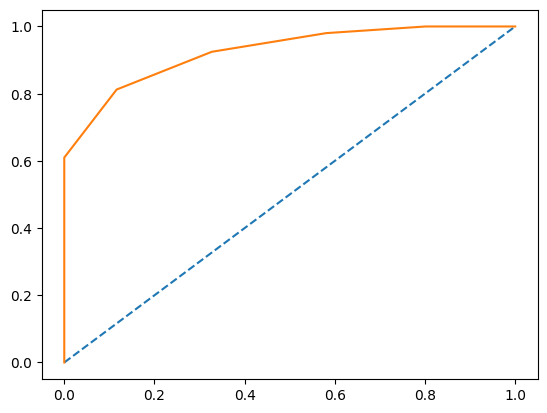

In [154]:
probs_train=KNN_model.predict_proba(x_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

In [155]:
y_test_predict=KNN_model.predict(x_test)

KNN_model_score=KNN_model.score(x_test, y_test)

print(KNN_model_score)

0.8026315789473685


In [168]:
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

[[ 85  48]
 [ 27 220]]
              precision    recall  f1-score   support

           0       0.76      0.64      0.69       133
           1       0.82      0.89      0.85       247

    accuracy                           0.80       380
   macro avg       0.79      0.76      0.77       380
weighted avg       0.80      0.80      0.80       380



AUC ROC Curve KNN Test


the auc curve 0.848 


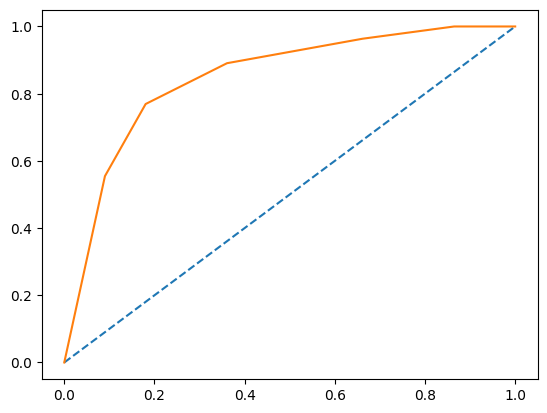

In [157]:
probs_test=KNN_model.predict_proba(x_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

Neighbour 7

In [158]:
KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [159]:
y_train_predict=KNN_model.predict(x_train)
KNN_model_score=KNN_model.score(x_train,y_train)
print(KNN_model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8434476693051891
[[212 115]
 [ 63 747]]
              precision    recall  f1-score   support

           0       0.77      0.65      0.70       327
           1       0.87      0.92      0.89       810

    accuracy                           0.84      1137
   macro avg       0.82      0.79      0.80      1137
weighted avg       0.84      0.84      0.84      1137



In [160]:
y_test_predict=KNN_model.predict(x_test)
KNN_model_score=KNN_model.score(x_test,y_test)
print(KNN_model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8052631578947368
[[ 82  51]
 [ 23 224]]
              precision    recall  f1-score   support

           0       0.78      0.62      0.69       133
           1       0.81      0.91      0.86       247

    accuracy                           0.81       380
   macro avg       0.80      0.76      0.77       380
weighted avg       0.80      0.81      0.80       380



In [161]:
KNN_model=KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(x_train,y_train)

KNeighborsClassifier()

In [162]:
y_train_predict=KNN_model.predict(x_train)
KNN_model_score=KNN_model.score(x_train,y_train)
print(KNN_model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8522427440633246
[[220 107]
 [ 61 749]]
              precision    recall  f1-score   support

           0       0.78      0.67      0.72       327
           1       0.88      0.92      0.90       810

    accuracy                           0.85      1137
   macro avg       0.83      0.80      0.81      1137
weighted avg       0.85      0.85      0.85      1137



In [163]:
y_test_predict=KNN_model.predict(x_test)
KNN_model_score=KNN_model.score(x_test,y_test)
print(KNN_model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8026315789473685
[[ 85  48]
 [ 27 220]]
              precision    recall  f1-score   support

           0       0.76      0.64      0.69       133
           1       0.82      0.89      0.85       247

    accuracy                           0.80       380
   macro avg       0.79      0.76      0.77       380
weighted avg       0.80      0.80      0.80       380



In [165]:
ac_score=[]

for k in range(1,20,2):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    scores=knn.score(x_test,y_test)
    ac_score.append(scores)

MCE=[1-x for x in ac_score]
MCE

[0.23947368421052628,
 0.21052631578947367,
 0.19736842105263153,
 0.1947368421052632,
 0.18947368421052635,
 0.19210526315789478,
 0.20789473684210524,
 0.19210526315789478,
 0.20263157894736838,
 0.20263157894736838]

AUC ROC curve after n classifier for train data set

the auc curve 0.889 


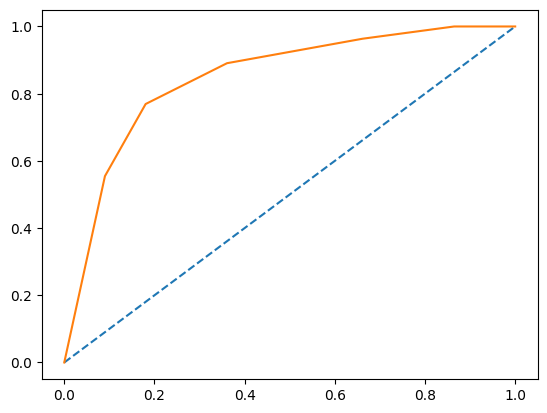

In [166]:
probs_train=knn.predict_proba(x_train)
probs_train=probs_train[:,1]
auc=roc_auc_score(y_train,probs_train)
print("the auc curve %.3f " % auc)

train_fpr,train_tpr,train_threshold=roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)


AUC ROC curve after n classifier for test data set

the auc curve 0.885 


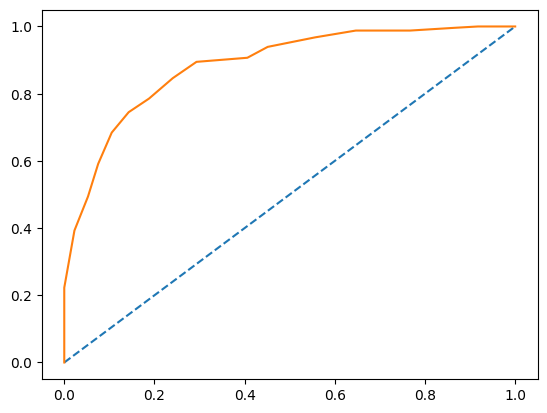

In [167]:
probs_test=knn.predict_proba(x_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

Naive Bayes Model

In [174]:
X = df.drop('vote',axis=1)     # Predictor feature columns (8 X m)
Y = df['vote']   # Predicted class (1=True, 0=False) (1 X m)
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)

In [ ]:
model = GaussianNB()
model.fit(X_train, Y_train)
print(model)
# make predictions
expected = Y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

GaussianNB()
              precision    recall  f1-score   support

         0.0       0.72      0.71      0.72       147
         1.0       0.86      0.87      0.87       309

    accuracy                           0.82       456
   macro avg       0.79      0.79      0.79       456
weighted avg       0.82      0.82      0.82       456

[[105  42]
 [ 41 268]]


In [175]:
model = GaussianNB()
model.fit(X_train, Y_train)
print(model)
# make predictions
expected = Y_train
predicted = model.predict(X_train)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

GaussianNB()
              precision    recall  f1-score   support

           0       0.72      0.69      0.71       313
           1       0.87      0.89      0.88       748

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.79      1061
weighted avg       0.83      0.83      0.83      1061

[[216  97]
 [ 82 666]]


In [4]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image
#import pydotplus as pydot
from sklearn import tree
from os import system

In [48]:
X = data_minmax.drop("vote" , axis=1)
y = data_minmax.pop("vote")

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

Build Decision Tree Model

In [50]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

Scoring our Decision Tree

In [51]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

1.0
0.8004385964912281


Visualizing the Decision Tree¶

In [52]:
from sklearn import tree

In [53]:
train_char_label = ['No', 'Yes']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_File.close()

In [54]:
#Works only if "dot" command works on you machine

retCode = system("dot -Tpng credit_tree.dot -o credit_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_tree.png"))


Reducing over fitting (Regularization)

In [55]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.8086710650329878
0.7894736842105263


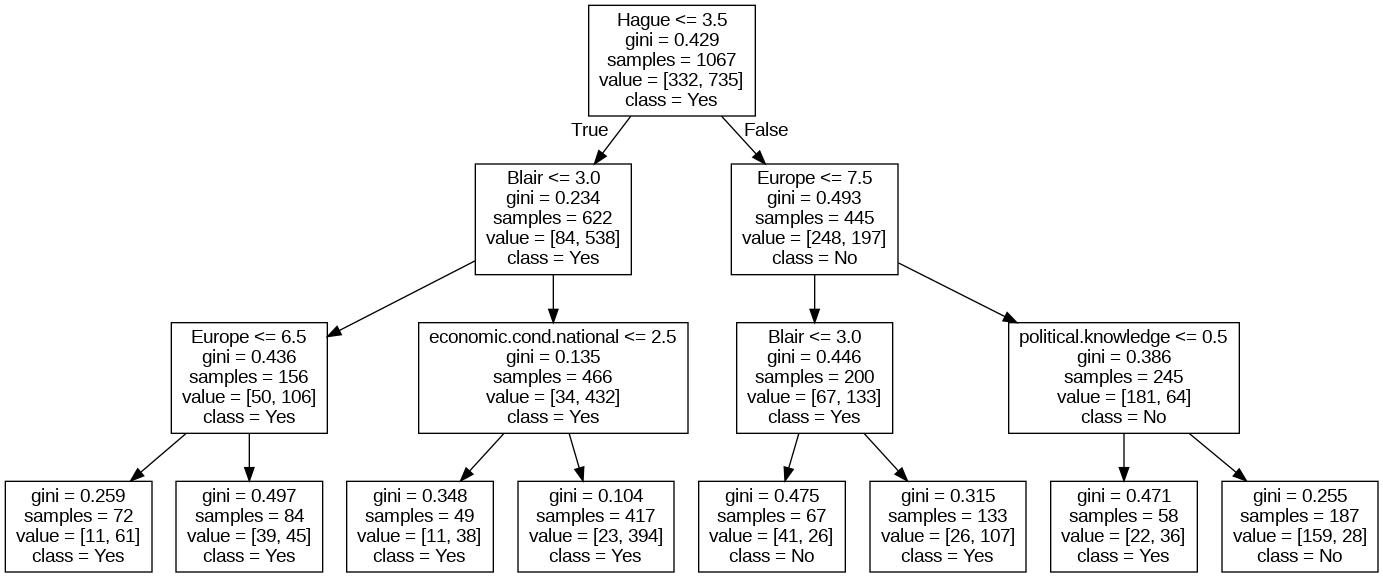

In [ ]:
train_char_label = ['No', 'Yes']
Credit_Tree_FileR = open('credit_treeR.dot','w')
dot_data = tree.export_graphviz(dTreeR, out_file=Credit_Tree_FileR, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_FileR.close()

#Works only if "dot" command works on you machine

retCode = system("dot -Tpng credit_treeR.dot -o credit_treeR.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_treeR.png"))

In [56]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train.columns))


                              Imp
age                      0.000000
economic_cond_national   0.000000
economic_cond_household  0.016012
Blair                    0.291569
Hague                    0.514417
Europe                   0.139003
political_knowledge      0.038999
gender_male              0.000000


0.7894736842105263


<Axes: >

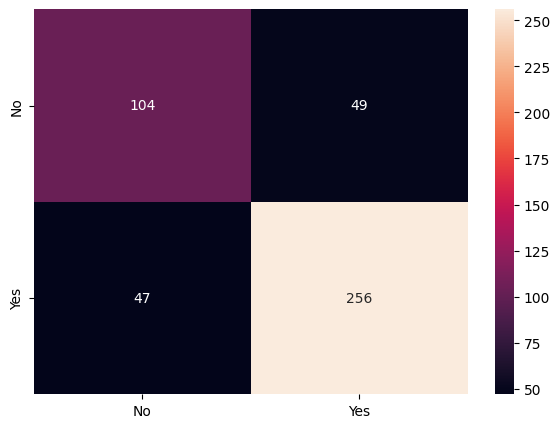

In [57]:
print(dTreeR.score(X_test , y_test))
y_predict = dTreeR.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [59]:
# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Tune the model using grid search
param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [None, 5, 10]}
model5 = GridSearchCV(model, param_grid, cv=5)
model5.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'n_estimators': [10, 50, 100]})

In [60]:
# Make predictions on the training and test data
y_train_pred5 = model5.predict(X_train)
y_test_pred5 = model5.predict(X_test)

In [61]:
#prediction on train
y_train_pred5

array([0., 1., 1., ..., 1., 1., 1.])

In [62]:
#prediction on test
y_test_pred5

array([1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
       0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1.,
       0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 0.

In [67]:
from sklearn.metrics import accuracy_score

In [68]:
# Compute the accuracy score for the training and test data
accuracy_train5 = accuracy_score(y_train, y_train_pred5)
accuracy_test5 = accuracy_score(y_test, y_test_pred5)

In [69]:
accuracy_train5

0.8727615457115928

In [70]:
accuracy_test5

0.8377192982456141

In [75]:
# Generate a confusion matrix for the training and test data
confusion_matrix_train5 = confusion_matrix(y_train, y_train_pred5)
confusion_matrix_test5 = confusion_matrix(y_test, y_test_pred5)

In [76]:
#train confusion matrix
confusion_matrix_train5

array([[211,  96],
       [ 39, 715]])

In [77]:
#test confusion matrix
confusion_matrix_test5

array([[101,  52],
       [ 22, 281]])

In [79]:
from sklearn.metrics import classification_report

In [80]:
# Generate a classification report for the training and test data
classification_report_train5 = classification_report(y_train, y_train_pred5)
classification_report_test5 = classification_report(y_test, y_test_pred5)

In [83]:
#train classification report
classification_report_train5

'              precision    recall  f1-score   support\n\n         0.0       0.84      0.69      0.76       307\n         1.0       0.88      0.95      0.91       754\n\n    accuracy                           0.87      1061\n   macro avg       0.86      0.82      0.84      1061\nweighted avg       0.87      0.87      0.87      1061\n'

In [84]:
#test classification report
classification_report_test5

'              precision    recall  f1-score   support\n\n         0.0       0.82      0.66      0.73       153\n         1.0       0.84      0.93      0.88       303\n\n    accuracy                           0.84       456\n   macro avg       0.83      0.79      0.81       456\nweighted avg       0.84      0.84      0.83       456\n'

Ensemble Learning - Bagging

In [91]:
X = df.drop('vote',axis=1)     # Predictor feature columns (8 X m)
Y = df['vote']

In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test= train_test_split(X,Y,test_size=0.30,random_state=1)

In [86]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [94]:
cart=DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100, random_state=1)

Bagging_model.fit(X_train,Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [95]:
y_train_predict=Bagging_model.predict(X_train)
Bagging_model_score=Bagging_model.score(X_train,Y_train)
print(Bagging_model_score)

print(metrics.confusion_matrix(Y_train,y_train_predict))
print(metrics.classification_report(Y_train,y_train_predict))

1.0
[[307   0]
 [  0 754]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



AUC: 1.000


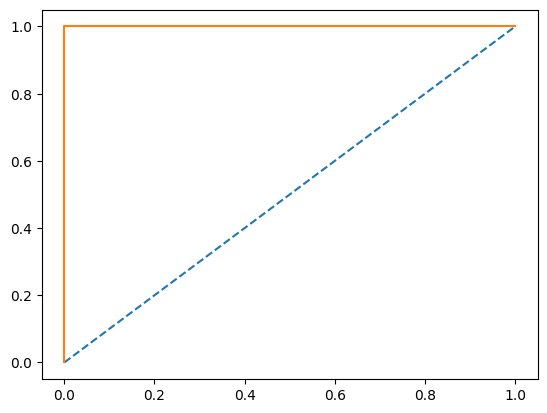

In [96]:
probs = Bagging_model.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

AUC: 0.881


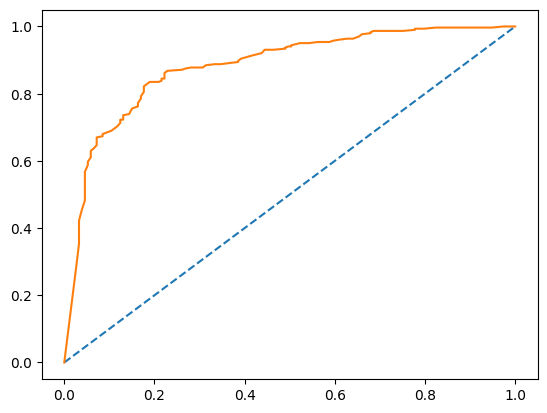

In [98]:
probs = Bagging_model.predict_proba(X_test)

probs = probs[:, 1]

auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr)

In [100]:
y_test_predict=Bagging_model.predict(X_test)
Bagging_model_score=Bagging_model.score(X_test,Y_test)
print(Bagging_model_score)

print(metrics.confusion_matrix(Y_test,y_test_predict))
print(metrics.classification_report(Y_test,y_test_predict))

0.8201754385964912
[[108  45]
 [ 37 266]]
              precision    recall  f1-score   support

           0       0.74      0.71      0.72       153
           1       0.86      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.80       456
weighted avg       0.82      0.82      0.82       456



0.8100436681222707


<Axes: >

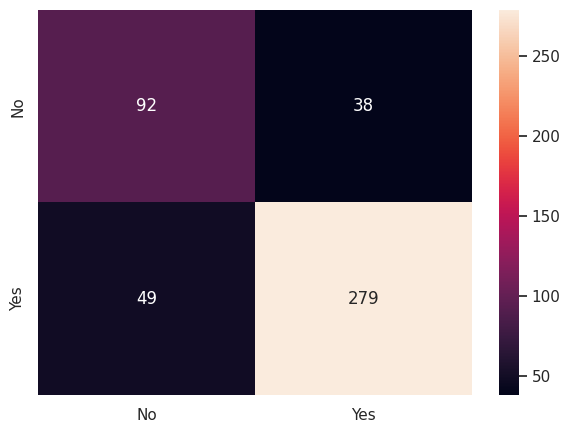

In [ ]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

Ensemble Learning - AdaBoosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)

0.8187772925764192


<Axes: >

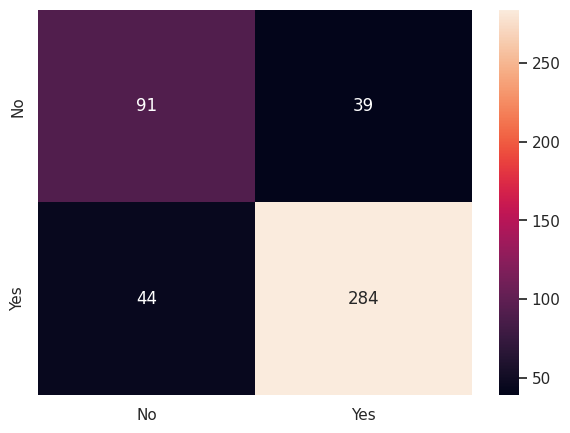

In [ ]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [101]:
from sklearn.ensemble import AdaBoostClassifier

In [102]:
ADB_model=AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,Y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [103]:
y_train_predict=ADB_model.predict(X_train)
ADB_model_score=ADB_model.score(X_train,Y_train)
print(ADB_model_score)

print(metrics.confusion_matrix(Y_train,y_train_predict))
print(metrics.classification_report(Y_train,y_train_predict))

0.8501413760603205
[[214  93]
 [ 66 688]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



AUC: 0.915


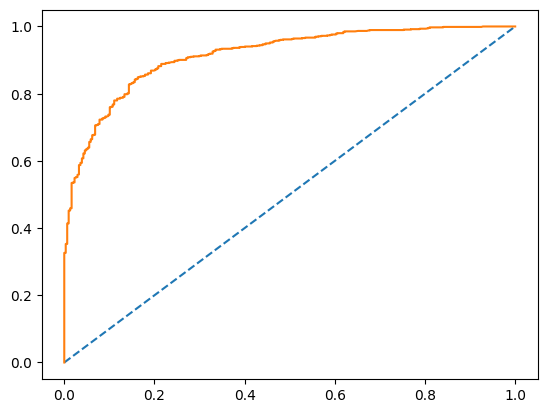

In [104]:
probs = ADB_model.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

AUC: 0.877


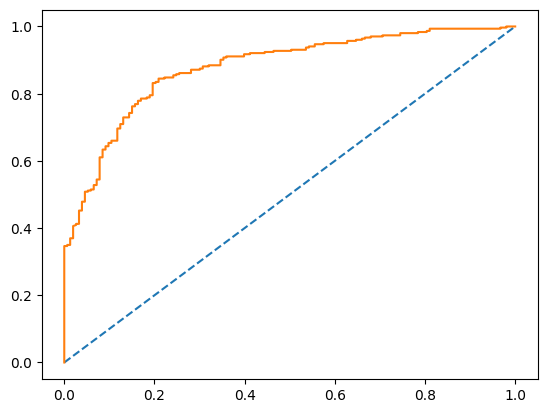

In [105]:
probs = ADB_model.predict_proba(X_test)

probs = probs[:, 1]

auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr)

Ensemble Learning - GradientBoost

In [106]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

0.8289473684210527


<Axes: >

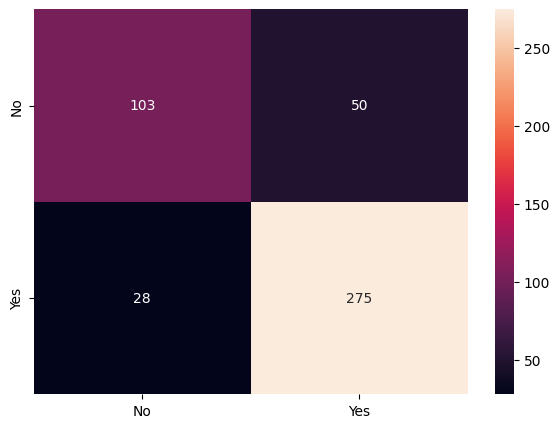

In [107]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

Ensemble RandomForest Classifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)

0.8100436681222707


<Axes: >

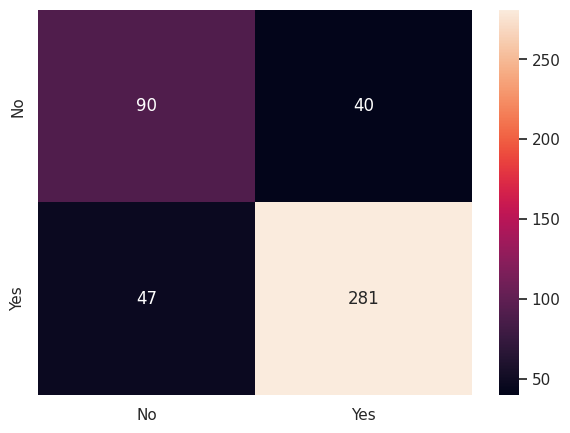

In [ ]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

PROJECT 2

In [ ]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [ ]:
all_words = inaugural.words()
len(all_words)

152901

In [ ]:
len(set(all_words))

10025

In [ ]:
nltk.FreqDist(all_words).most_common(30)

[('the', 9555),
 (',', 7275),
 ('of', 7169),
 ('and', 5226),
 ('.', 5011),
 ('to', 4477),
 ('in', 2604),
 ('a', 2229),
 ('our', 2062),
 ('that', 1769),
 ('be', 1505),
 ('is', 1477),
 ('we', 1281),
 ('for', 1141),
 ('by', 1063),
 ('it', 1036),
 ('have', 1029),
 ('which', 1007),
 ('not', 972),
 ('will', 935),
 ('as', 926),
 ('with', 918),
 ('I', 882),
 ('are', 820),
 ('all', 807),
 ('this', 755),
 ('their', 743),
 ('The', 634),
 ('has', 632),
 ('people', 589)]

Extracting the RAW text for each document

In [ ]:
roosevelt_text=inaugural.raw('1941-Roosevelt.txt')
kennedy_text=inaugural.raw('1961-Kennedy.txt')
nixon_text=inaugural.raw('1973-Nixon.txt')

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Find the number of characters, words and sentences for the mentioned documents.

ROOSEVELT TEXT



In [ ]:
roosevelt_char_count = len(roosevelt_text)
roosevelt_word_count = len(inaugural.words('1941-Roosevelt.txt'))
roosevelt_sent_count = len(inaugural.sents('1941-Roosevelt.txt'))

In [ ]:

print(roosevelt_char_count )
print(roosevelt_word_count )
print(roosevelt_sent_count)


7571
1536
68


KENENDY TEXT

In [ ]:
kennedy_char_count = len(kennedy_text)
kennedy_word_count = len(inaugural.words('1961-Kennedy.txt'))
kennedy_sent_count = len(inaugural.sents('1961-Kennedy.txt'))

In [ ]:

print(kennedy_char_count )
print(kennedy_word_count )
print(kennedy_sent_count)

7618
1546
52


NIXON TEXT

In [ ]:
nixon_char_count = len(nixon_text)
nixon_word_count = len(inaugural.words('1973-Nixon.txt'))
nixon_sent_count = len(inaugural.sents('1973-Nixon.txt'))

In [ ]:
print(nixon_char_count )
print(nixon_word_count )
print(nixon_sent_count)

9991
2028
69


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import string
stopwords=nltk.corpus.stopwords.words('english')+list(string.punctuation)

In [ ]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
all_words_clean=[]
def clean(x):
    for word in x:
        if word not in stopwords:
            all_words_clean.append(word)

clean(all_words)
all_words_clean

['Fellow',
 'Citizens',
 'Senate',
 'House',
 'Representatives',
 'Among',
 'vicissitudes',
 'incident',
 'life',
 'event',
 'could',
 'filled',
 'greater',
 'anxieties',
 'notification',
 'transmitted',
 'order',
 'received',
 '14th',
 'day',
 'present',
 'month',
 'On',
 'one',
 'hand',
 'I',
 'summoned',
 'Country',
 'whose',
 'voice',
 'I',
 'never',
 'hear',
 'veneration',
 'love',
 'retreat',
 'I',
 'chosen',
 'fondest',
 'predilection',
 'flattering',
 'hopes',
 'immutable',
 'decision',
 'asylum',
 'declining',
 'years',
 '--',
 'retreat',
 'rendered',
 'every',
 'day',
 'necessary',
 'well',
 'dear',
 'addition',
 'habit',
 'inclination',
 'frequent',
 'interruptions',
 'health',
 'gradual',
 'waste',
 'committed',
 'time',
 'On',
 'hand',
 'magnitude',
 'difficulty',
 'trust',
 'voice',
 'country',
 'called',
 'sufficient',
 'awaken',
 'wisest',
 'experienced',
 'citizens',
 'distrustful',
 'scrutiny',
 'qualifications',
 'could',
 'overwhelm',
 'despondence',
 'one',
 'inher

In [ ]:
all_words_freq=nltk.FreqDist(all_words_clean)
all_words_freq

FreqDist({'I': 882, 'The': 634, 'people': 589, 'We': 557, 'us': 502, 'must': 373, 'It': 366, 'upon': 365, '--': 363, 'Government': 334, ...})

In [108]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [109]:
nltk.download('inaugural')

[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.


True

In [110]:
from nltk.corpus import inaugural

In [111]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [124]:
# Create a list of tuples, each containing the name of a speech and the corresponding file name
speeches = [('Franklin D. Roosevelt', '1941-Roosevelt.txt'),
            ('John F. Kennedy', '1961-Kennedy.txt'),
            ('Richard Nixon', '1973-Nixon.txt')]

# Print the table header
print("{:20s} {:>10s} {:>10s} {:>10s}".format("Speech", "Chars", "Words", "Sentences"))

# Print a row for each speech
for name, file in speeches:
    speech = inaugural.raw(file)
    words = inaugural.words(file)
    sents = inaugural.sents(file)
    print("{:20s} {:10d} {:10d} {:10d}".format(name, len(speech), len(words), len(sents)))

Speech                    Chars      Words  Sentences
Franklin D. Roosevelt       7571       1536         68
John F. Kennedy            7618       1546         52
Richard Nixon              9991       2028         69


2.2 Remove all the stopwords from all three speeches.

In [126]:
# Create a list of tuples, each containing the name of a speech and the corresponding file name
speeches = [('Franklin D. Roosevelt', '1941-Roosevelt.txt'),
            ('John F. Kennedy', '1961-Kennedy.txt'),
            ('Richard Nixon', '1973-Nixon.txt')]

# Print the table header
print("{:20s} {:>10s} {:>10s} {:>10s}".format("Speech", "Chars", "Words", "Sentences"))

# Print a row for each speech
for name, file in speeches:
    speech = inaugural.raw(file)
    words = inaugural.words(file)
    sents = inaugural.sents(file)
    print("{:20s} {:10d} {:10d} {:10d}".format(name, len(speech), len(words), len(sents)))

Speech                    Chars      Words  Sentences
Franklin D. Roosevelt       7571       1536         68
John F. Kennedy            7618       1546         52
Richard Nixon              9991       2028         69


In [113]:
FDR = inaugural.words('1941-Roosevelt.txt')
JFK = inaugural.words('1961-Kennedy.txt')
RNX = inaugural.words('1973-Nixon.txt')

In [114]:
import re
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stopwords = set(stopwords.words('english')+list(string.punctuation))
def remove_stopwords(array,stopwords):
    filtered = []
    for a in array:
        al = a.lower()
        if al not in stopwords and a!='--':
            filtered.append(al)
    return filtered
FDR_clean = remove_stopwords(FDR,stopwords)
JFK_clean = remove_stopwords(JFK,stopwords)
RNX_clean = remove_stopwords(RNX,stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [115]:
print("Number of words in Speech of President Franklin D. Roosevelt in 1941-after removal of stopwords are",len(FDR_clean))
print("Number of words in Speech of President John F. Kennedy in 1961-after removal of stopwords are",len(JFK_clean))
print("Number of words in Speech of President Richard Nixon in 1973-after removal of stopwords are",len(RNX_clean))

Number of words in Speech of President Franklin D. Roosevelt in 1941-after removal of stopwords are 632
Number of words in Speech of President John F. Kennedy in 1961-after removal of stopwords are 697
Number of words in Speech of President Richard Nixon in 1973-after removal of stopwords are 836


2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [117]:
nltk.download('punkt')
from collections import Counter
# Word occurs the most number of times
def highest3words(array):
    Ctr = Counter(array)
    most_occur = Ctr.most_common(1)
    return most_occur

print("Top word which occured the most number of times in inaugural address of President Franklin D. Roosevelt in 1941 is", highest3words(FDR_clean))
print("Top word which occured the most number of times in inaugural address of President John F. Kennedy in 1961 is", highest3words(JFK_clean))
print("Top word which occured the most number of times in inaugural address of President Richard Nixon in 1973 is", highest3words(RNX_clean))

Top word which occured the most number of times in inaugural address of President Franklin D. Roosevelt in 1941 is [('nation', 12)]
Top word which occured the most number of times in inaugural address of President John F. Kennedy in 1961 is [('let', 16)]
Top word which occured the most number of times in inaugural address of President Richard Nixon in 1973 is [('us', 26)]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [118]:
# Mention the top three words.
def highestthreewords (array):
    Ctr = Counter(array)
    most_occur = Ctr.most_common(3)
    return most_occur
print("Top 3 words which occured the most number of times in inaugural address of President Franklin D. Roosevelt in 1941 is", highestthreewords(FDR_clean))
print("Top 3 words which occured the most number of times in inaugural address of President John F. Kennedy in 1961 is", highestthreewords(JFK_clean))
print("Top 3 words which occured the most number of times in inaugural address of President Richard Nixon in 1973 is", highestthreewords(RNX_clean))

Top 3 words which occured the most number of times in inaugural address of President Franklin D. Roosevelt in 1941 is [('nation', 12), ('know', 10), ('spirit', 9)]
Top 3 words which occured the most number of times in inaugural address of President John F. Kennedy in 1961 is [('let', 16), ('us', 12), ('world', 8)]
Top 3 words which occured the most number of times in inaugural address of President Richard Nixon in 1973 is [('us', 26), ('let', 22), ('america', 21)]


2.4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords)

In [119]:
pip install wordcloud

In [120]:
import matplotlib.pyplot as plt
import string # this is used for string manipulations
import matplotlib
# Word Cloud
from wordcloud import WordCloud
def word_cloud(w):
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                min_font_size = 10).generate(w)
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

Word Cloud for President Franklin D. Roosevelt speech in 1941


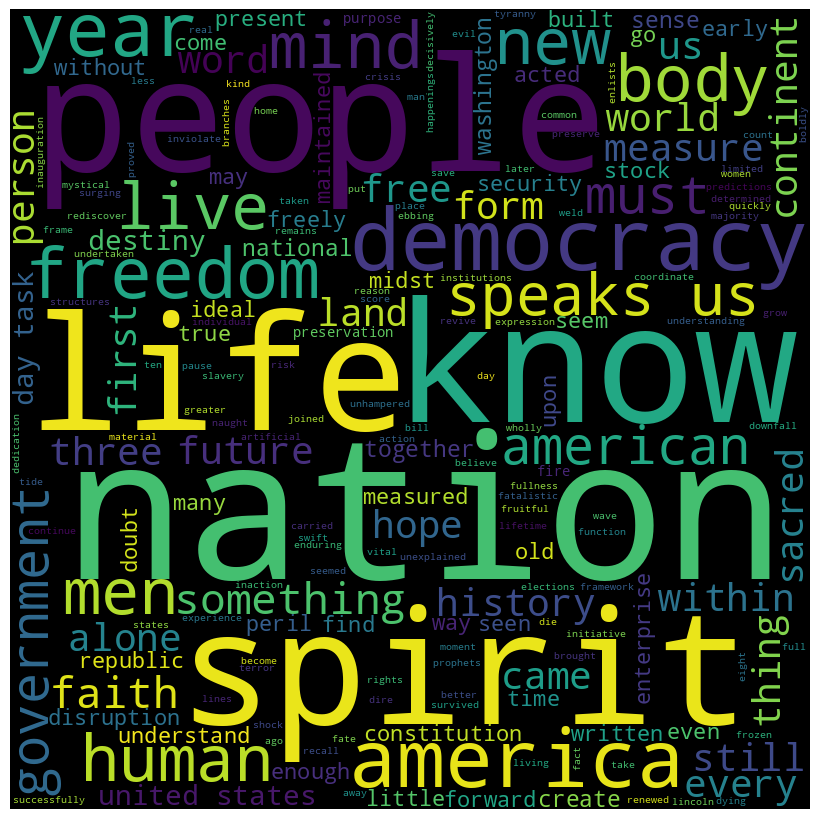

In [121]:
# Word Cloud for President Franklin D. Roosevelt speech in 1941
print('Word Cloud for President Franklin D. Roosevelt speech in 1941')
word_cloud((" ").join(FDR_clean))

Word Cloud for President John F. Kennedy speech in 1961


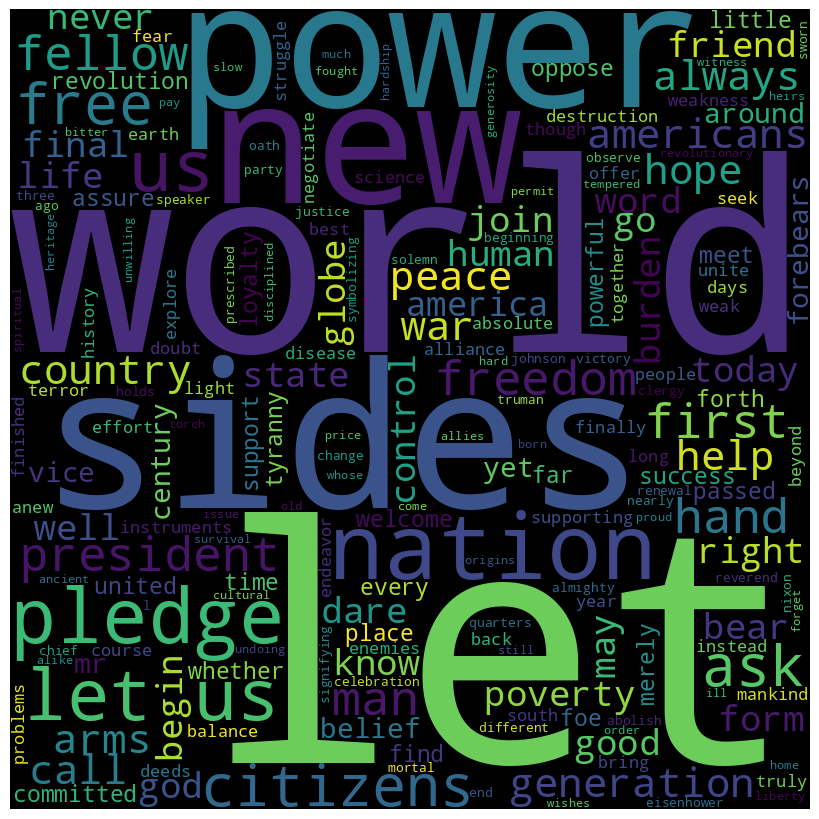

In [122]:
# Word Cloud for President John F. Kennedy speech in 1961
print('Word Cloud for President John F. Kennedy speech in 1961')
word_cloud((" ").join(JFK_clean))

Word Cloud for President Richard Nixon speech in 1973


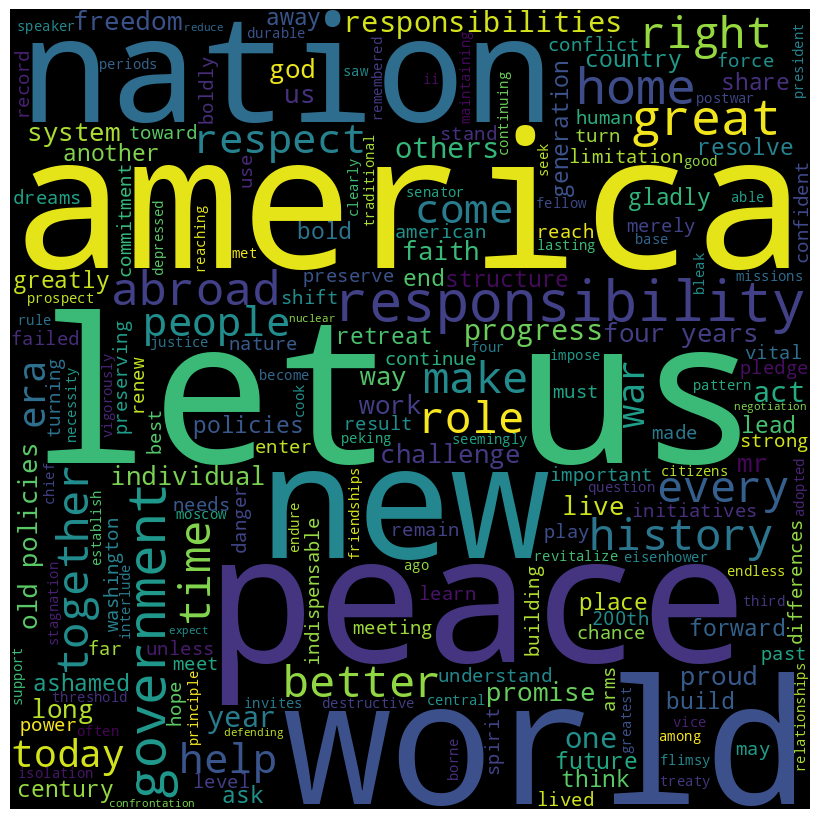

In [123]:
# Word Cloud for President Richard Nixon speech in 1973
print('Word Cloud for President Richard Nixon speech in 1973')
word_cloud((" ").join(RNX_clean))